In [1]:
import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')






 



In [2]:
import math
import numpy as np

the_gold_standard = { 0: (203.0/255.0, 15.0/255.0, 40.0/255.0),
                      1: (255.0/255.0, 165.0/255.0, 0.0),
                      2: (42.0/255.0, 46.0/255.0, 139.0/255.0),
                      3: (0.0/255.0, 153.0/255.0, 204.0/255.0),
                      4: (0.0/255.0, 221.0/255.0, 52.0/255.0),
                      5: (0.0, 0.75, 0.75),
                      6: (0.0, 0.0, 0.0),
                    }

# ******************************************************************************
# definition of color interpolation utilities:

def color_linear_interpolation( rgb_1, rgb_2, alpha ):
    """
    This function performs a linear color interpolation in RGB space.
    alpha has to go from zero to one and is the coordinate.
    """
    _out_color = []
    for _a,_b in zip(rgb_1,rgb_2):
        _out_color.append( float(_a +(_b-_a)*alpha) )
    return tuple(_out_color)


def nice_colors( num, colormap='the_gold_standard', interpolation_method='linear', output_format='RGB' ):
    """
    This function returns a color from a colormap defined above, according to the
    number entered.

    :param num: input number. Can be an integer or float.
        If the number is integer the function returns one of the colors in the
        colormap. If the number is a float returns the shade combining the two
        neighbouring colors.
    :type num: :class:`int` or :class:`float`

    :param colormap: a string containing the name of the colormap.
    :type colormap: :class:`string`

    :param interpolation_method: the method to interpolate between colors.
        Legal choices are:
            interpolation_method='linear', linear interpolation;
        Further interpolation methods will be added in the future.
    :type interpolation_method: :class:`string`

    :param output_format: output format of the color.
        Legal choices are:
            output_format='HEX'
            output_format='RGB' (default)
    :type output_format: :class:`string`

    :return: string with HEX color or tuple with RGB coordinates

    """
    # get the colormap:
    try:
        _cmap = globals()[str(colormap)]
    except:
        raise ValueError('Requested color map ('+str(colormap)+') does not exist.')
    # get the indexes of the color map:
    _idx_low = int( math.floor(num%len(_cmap)) )
    _idx_up  = int( math.floor((_idx_low+1)%len(_cmap)) )
    # perform color interpolation:
    if interpolation_method=='linear':
        _t = num%len(_cmap)-_idx_low
        _out_color = color_linear_interpolation(_cmap[_idx_low],_cmap[_idx_up],_t)
    else:
        raise ValueError('Requested color interpolation method ('+str(interpolation_method)+') does not exist.')
    # choose the output format:
    if output_format=='HEX':
        _out_color = '#%02x%02x%02x' % tuple( [ int(_c*255.) for _c in _out_color] )
        _out_color = str(_out_color)
    elif output_format=='RGB':
        pass
    else:
        raise ValueError('Requested output format ('+str(output_format)+') does not exist.')
    #
    return _out_color




In [3]:
filenames = ['/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.2_0.4_dojk_True_njk_60_desy3_w1.pk',
'/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.4_0.55_dojk_True_njk_60_desy3_w1.pk',
'/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.55_0.7_dojk_True_njk_60_desy3_w1.pk',
'/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.7_0.85_dojk_True_njk_60_desy3_w1.pk',
'/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.85_0.95_dojk_True_njk_60_desy3_w1.pk',
'/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/results/dy/dy_act_deprojects_nothing_v1.0.0_fwhm_2arcmin_nside4096__z_0.95_1.05_dojk_True_njk_60_desy3_w1.pk',
            ]

labels = [r'$0.2 < z < 0.4$',r'$0.4 < z < 0.55$',r'$0.55 < z < 0.7$', r'$0.7 < z < 0.85$', r'$0.85 < z < 0.95$', r'$0.95 < z < 1.05$']


# linestyles = ['-.','-','--',':','-.','-','--']
factor = 1.




In [11]:
wtheta_yg_dict = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_gg_maglim_2mrs_beamed.npz')





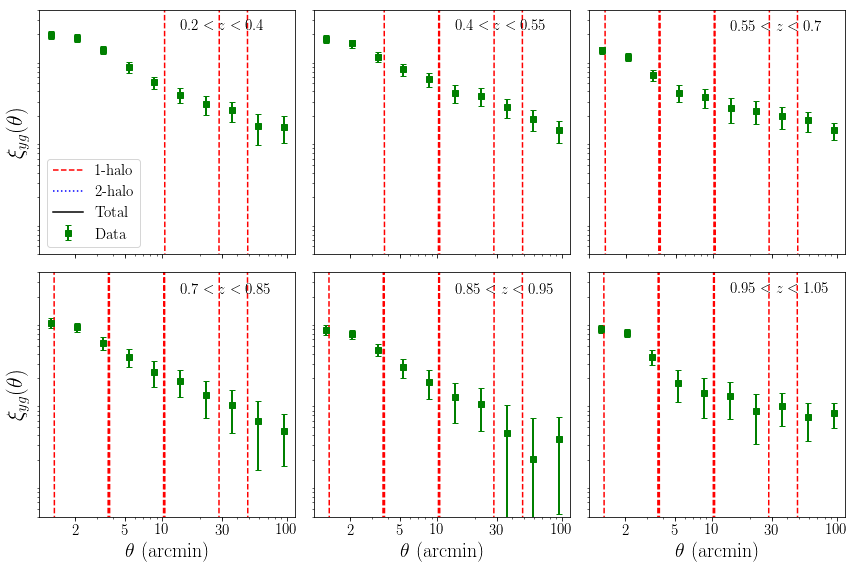

In [12]:
nbins = 6
bins = (np.arange(6) + 1).astype(int)
fig, ax = pl.subplots(2,3, figsize = (12,8),sharey=True,sharex=True)
jc = 0
for j1 in range(2):    
    for j2 in range(3):
        
        filename = filenames[jc]
        haloydata = pk.load(open(filename, "rb"))

        dytruth = haloydata['dytruth']
        randytruth = haloydata['randytruth']

        xi_dytruth = dytruth.xi - randytruth.xi

        if haloydata['do_jk']:
            njk = haloydata['njk']


            xi_dytruth_big_all = haloydata['xi_dytruth_big_all']
            xi_randytruth_big_all = haloydata['xi_randytruth_big_all']
            xi_dytruth_all= (xi_dytruth_big_all-xi_randytruth_big_all)
            xi_dytruth_mean = np.tile(np.mean(xi_dytruth_all,axis=0),(njk,1))
            xi_dytruth_sigma = np.sqrt((1.0*(njk-1.)/njk)*(np.sum(np.square(xi_dytruth_all - xi_dytruth_mean),axis=0)))

        wtheta_yg_1h = wtheta_yg_dict[ str(bins[jc]) + '-1h'] 
        wtheta_yg_2h = wtheta_yg_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yg = wtheta_yg_dict[ str(bins[jc]) + '-tot']
        theta = wtheta_yg_dict['theta_arcmin']
        

        ax[j1,j2].errorbar(factor*np.exp(dytruth.logr), xi_dytruth, yerr=xi_dytruth_sigma, linestyle='None', marker='s',capsize=3, lw = 2, color ='green',label='Data')
        ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
        ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        ax[j1,j2].plot(theta, wtheta_yg , ls='-',color='k',label='Total')
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,2,5,10,30,100])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)

        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_ylim((4.0e-10,4.0e-7))
        ax[j1,j2].set_yticks([])

        ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)

        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{yg}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{yg}(\theta)$ ', size = 22)
ax[0,0].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yg_compare_maglim_allbins.pdf')
# fig.savefig('xi_yg_compare_maglim_allbins.png',dpi=240)








In [25]:
wtheta_yk_dict = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/results_wtheta_ky_desy1.npz')
wtheta_ygt_dict = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/results_xi_gty_desy1.npz')
wtheta_kk_dict = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/results_wtheta_kk_desy1.npz')



In [26]:
wtheta_yk_dict.keys()


KeysView(<numpy.lib.npyio.NpzFile object at 0x1179fb908>)

In [27]:
from astropy.io import fits
desy1 = fits.open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/data/2pt_NG_desy1.fits')
desy1.info()


Filename: /Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/data/2pt_NG_desy1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  xip           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  3  xim           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  4  gammat        1 BinTableHDU     29   400R x 5C   [K, K, K, D, D]   
  5  wtheta        1 BinTableHDU     29   100R x 5C   [K, K, K, D, D]   
  6  nz_source     1 BinTableHDU     32   400R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     31   400R x 8C   [D, D, D, D, D, D, D, D]   


In [28]:
(desy1['wtheta'].data['ANG'][0:20])



array([  2.82881471,   3.55549657,   4.47718559,   5.64530255,
         7.10386616,   8.94340648,  11.25845287,  14.17334325,
        17.8474059 ,  22.47101135,  28.29194541,  35.61296609,
        44.83872679,  56.44005706,  71.05964081,  89.46024775,
       112.60750833, 141.74738602, 178.44158341, 224.62303026])

In [81]:
block_res = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/results_block_ell_kk_ky_desy1.npz')
binv = 1
wt_cov_G_b11 = block_res['real_covg_kk_kk_bin_' + str(binv) + '_' + str(binv)]
theta_rad_bl = block_res['theory_theta_rad']

# block_res.keys()


In [4]:
df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')



In [18]:
df['shearshear_y3'].keys()


dict_keys(['3_1', '3_0', '3_3', '3_2', '2_0', '2_1', '2_2', '2_3', '1_3', '1_2', '1_1', '1_0', '0_2', '0_3', '0_0', '0_1'])

In [22]:
ntheta = len(df['Yshear_y3'][str(0)]['theta'])
bins_array = [1,2,3,4]
nbins = len([*df['Yshear_y3'].keys()])

Cl_shearshear = np.zeros(ntheta*nbins)
Cl_sheary = np.zeros(ntheta*nbins)

cov_shearshear = np.zeros((ntheta*nbins,ntheta*nbins))
cov_sheary = np.zeros((ntheta*nbins,ntheta*nbins))



theta_sheary = np.array([])
theta_shearshear = np.array([])

for j2 in range(len(bins_array)):
    # j2 = bins_array[j]

    kk_cov = df['shearshear_y3'][str(j2)+ '_' + str(j2)]['cov']
    kk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
    kk_th_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['theta'] * 180. / np.pi
    kk_err = df['shearshear_y3'][str(j2) + '_' + str(j2)]['err']
    Cl_shearshear[ntheta * (j2):ntheta * (j2 + 1)] = kk_g
    cov_shearshear[ntheta*(j2):ntheta*(j2+1),ntheta*(j2):ntheta*(j2+1)] = kk_cov

    if len(theta_shearshear) == 0:
        theta_shearshear = df['shearshear_y3'][str(j2)+ '_' + str(j2)]['theta'] * 180. / np.pi
    else:
        theta_shearshear = np.vstack((theta_shearshear,df['shearshear_y3'][str(j2)+ '_' + str(j2)]['theta'] * 180. / np.pi))

    yk_cov = df['Yshear_y3'][str(j2)]['cov']
    yk_g = df['Yshear_y3'][str(j2)]['xip']
    yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180. / np.pi
    yk_err = df['Yshear_y3'][str(j2)]['err']
    Cl_sheary[ntheta*(j2):ntheta*(j2+1)] = yk_g
    cov_sheary[ntheta*(j2):ntheta*(j2+1),ntheta*(j2):ntheta*(j2+1)] = yk_cov

    if len(theta_sheary) == 0:
        theta_sheary = df['Yshear_y3'][str(j2)]['theta'] * 180. / np.pi
    else:
        theta_sheary = np.vstack((theta_sheary,df['Yshear_y3'][str(j2)]['theta'] * 180. / np.pi))



cov_total = np.zeros((2*ntheta*nbins,2*ntheta*nbins))
cov_total[0:ntheta*nbins,0:ntheta*nbins] = cov_shearshear
cov_total[ntheta*nbins:2*ntheta*nbins,ntheta*nbins:2*ntheta*nbins] = cov_sheary

corrf_comb = np.hstack((Cl_shearshear,Cl_sheary))

theta_comb = np.vstack((theta_shearshear,theta_sheary))




/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


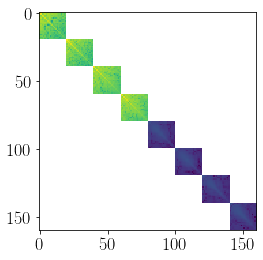

In [24]:
pl.figure()
pl.imshow(np.log(np.abs(cov_total)))



In [5]:
df.keys()


dict_keys(['Yshear_y1', 'Yshear_y3', 'YY_y3', 'YY_y1', 'shearshear_y3', 'shearshear_y1'])

In [84]:
print(len(df['Yshear_y1']['0']['xip']))
print(len(df['Yshear_y1']['0']['xim']))
print(len(df['Yshear_y1']['0']['cov']))
df['shearshear_y1'].keys()


20
20
20


dict_keys(['3_1', '3_0', '3_3', '3_2', '2_0', '2_1', '2_2', '2_3', '1_3', '1_2', '1_1', '1_0', '0_2', '0_3', '0_0', '0_1'])

In [85]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))



SNR kk bin1=5.02 sigma
SNR kk bin2=8.97 sigma
SNR kk bin3=13.14 sigma
SNR kk bin4=10.92 sigma


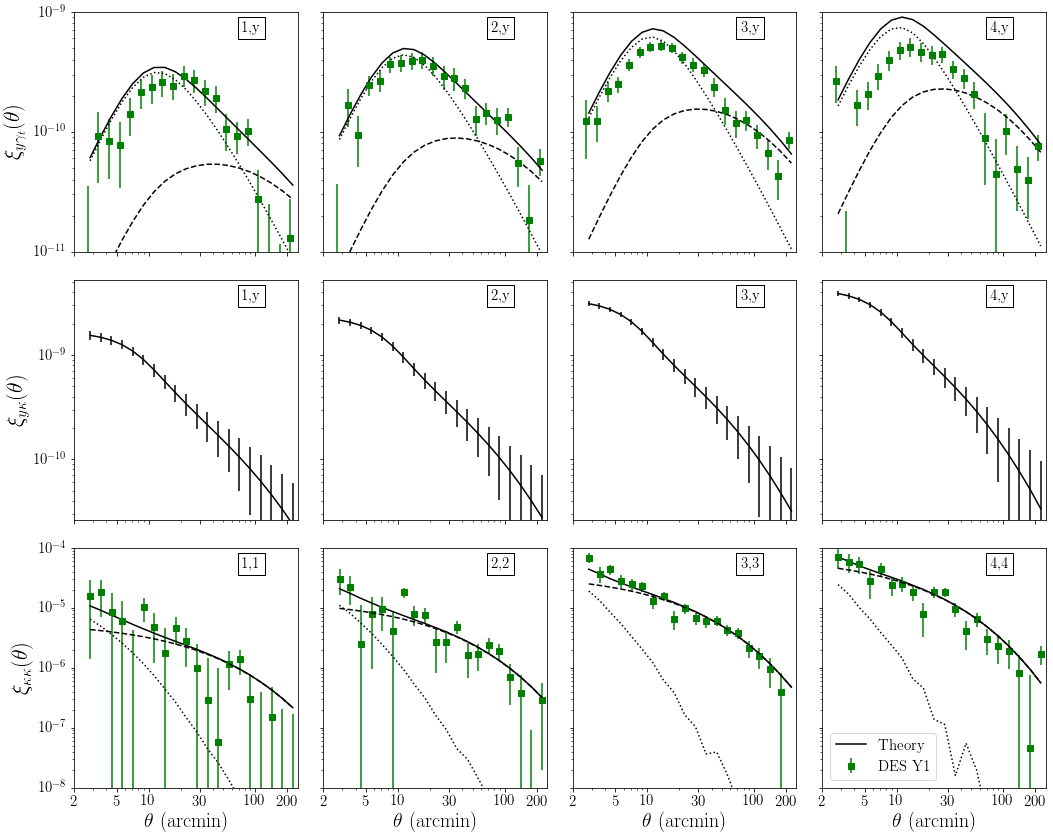

In [86]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(3,4, figsize = (15,12),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(3):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
            wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].errorbar(theta, wtheta_ygt, ls='-',color='k')
            
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] + wtheta_ygt_dict[ str(bins[j2]) + '-2h'], ls='-',color='k')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            ax[j1,j2].set_ylim(1e-11,1e-9)
        if j1 == 1:
            wt_cov_G_bl = block_res['real_covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            



            ax[j1,j2].errorbar(theta, wtheta_yk, sig_bl , ls='-',color='k')
            
            
            
        if j1 == 2:
            ax[j1,j2].plot(theta, wtheta_kk , ls='-',color='k',label='Theory')
            ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
            ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
            ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] + wtheta_kk_dict[ str(bins[j2]) + '-2h'], ls='-',color='k')
            ax[j1,j2].set_ylim(1e-8,1e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[2,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')











SNR kk bin1=5.02 sigma
SNR y-gt bin1=8.32 sigma
SNR kk bin2=8.97 sigma
SNR y-gt bin2=11.56 sigma
SNR kk bin3=13.14 sigma
SNR y-gt bin3=15.04 sigma
SNR kk bin4=10.92 sigma
SNR y-gt bin4=10.97 sigma


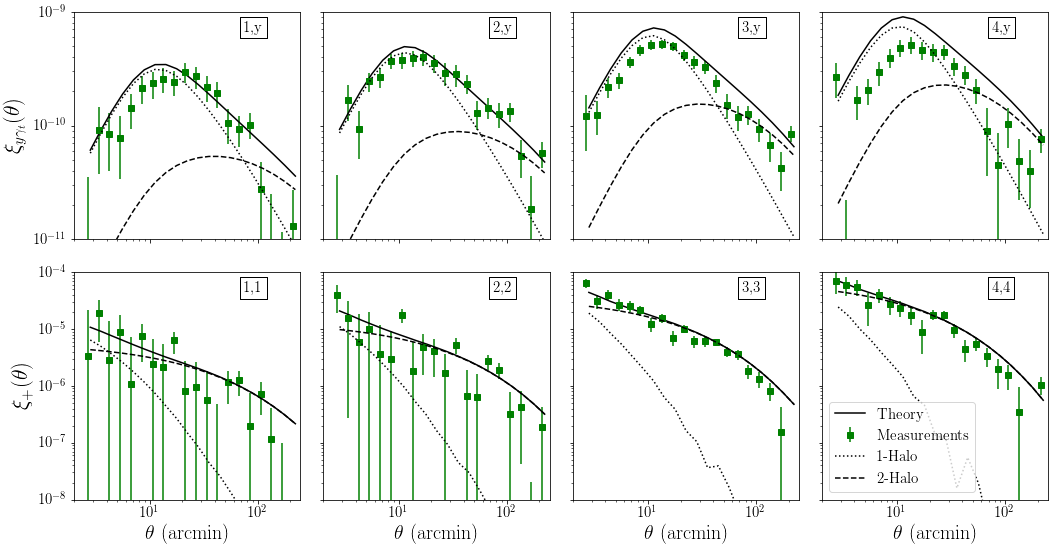

In [87]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
            wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            ax[j1,j2].errorbar(theta, wtheta_ygt,  ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].set_ylim(1e-11,1e-9)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            ax[j1,j2].plot(theta, wtheta_kk , ls='-',color='k',label='Theory')
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k',label='1-Halo')
            ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k',label='2-Halo')
            ax[j1,j2].set_ylim(1e-8,1e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,5,10,30,100,200])
#             labels_bottom = ticks
#             ax[0,j2].set_xticks(ticks)
#             ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins.pdf')
fig.savefig('xi_ygt_kk_allbins.png',dpi=240)












SNR kk bin1=5.02 sigma
SNR y-gt Y1 bin1=8.32 sigma
SNR y-gt Y3 bin1=12.44 sigma
SNR kk bin2=8.97 sigma
SNR y-gt Y1 bin2=11.56 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR kk bin3=13.14 sigma
SNR y-gt Y1 bin3=15.04 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR kk bin4=10.92 sigma
SNR y-gt Y1 bin4=10.97 sigma
SNR y-gt Y3 bin4=19.76 sigma


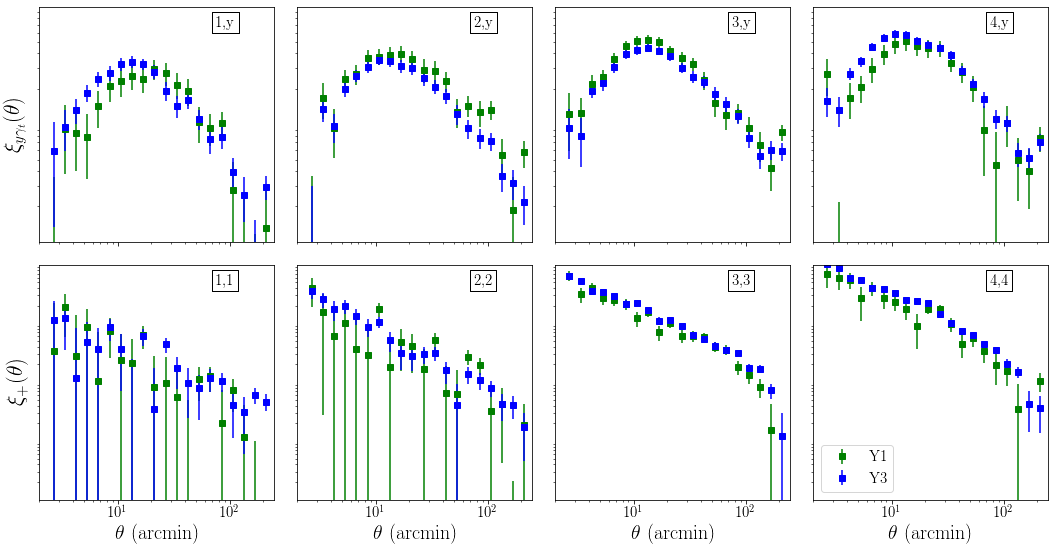

In [135]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
#             wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             theta_rad_bl = block_res['theory_theta_rad']
#             theta_bl = theta_rad_bl * 180. * 60./np.pi
#             sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].errorbar(theta, wtheta_ygt,  ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y1 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Y1')
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y3')
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].set_ylim(1e-11,1e-9)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Y1')
            
            yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err']
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y3')
#             ax[j1,j2].plot(theta, wtheta_kk , ls='-',color='k',label='Theory')
# #             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k',label='1-Halo')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k',label='2-Halo')
            ax[j1,j2].set_ylim(1e-8,1e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        ax[j1,j2].set_yticks([])
        
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,5,10,30,100,200])
#             labels_bottom = ticks
#             ax[0,j2].set_xticks(ticks)
#             ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_y1_vs_y3.pdf')
fig.savefig('xi_ygt_kk_allbins_y1_vs_y3.png',dpi=240)













SNR kk bin1=5.02 sigma
SNR y-gt Y1 bin1=8.32 sigma
SNR y-gt Y3 bin1=12.44 sigma
SNR kk bin2=8.97 sigma
SNR y-gt Y1 bin2=11.56 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR kk bin3=13.14 sigma
SNR y-gt Y1 bin3=15.04 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR kk bin4=10.92 sigma
SNR y-gt Y1 bin4=10.97 sigma
SNR y-gt Y3 bin4=19.76 sigma


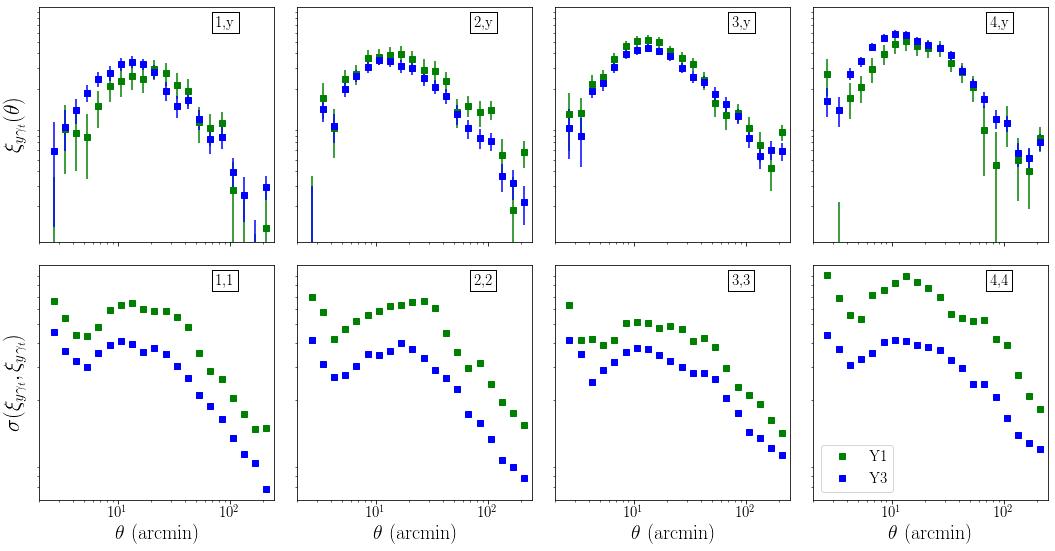

In [102]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
#             wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             theta_rad_bl = block_res['theory_theta_rad']
#             theta_bl = theta_rad_bl * 180. * 60./np.pi
#             sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].errorbar(theta, wtheta_ygt,  ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y1 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Y1')
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y3')
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].set_ylim(1e-11,1e-9)
            
            
            
        if j1 == 1:
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']

            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='Y1')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']

            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='blue',label='Y3')

#             yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
#             yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
#             yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
# #             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
#             ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Y1')
            
#             yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
#             yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
#             yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label='Y3')
# #             ax[j1,j2].plot(theta, wtheta_kk , ls='-',color='k',label='Theory')
# # #             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k',label='1-Halo')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k',label='2-Halo')
#             ax[j1,j2].set_ylim(1e-8,1e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        ax[j1,j2].set_yticks([])
        
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,5,10,30,100,200])
#             labels_bottom = ticks
#             ax[0,j2].set_xticks(ticks)
#             ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_y1_vs_y3.pdf')
fig.savefig('xi_ygt_allbins_y1_vs_y3.png',dpi=240)












SNR kk bin1=5.02 sigma
SNR y-gt bin1=8.32 sigma
SNR kk bin2=8.97 sigma
SNR y-gt bin2=11.56 sigma
SNR kk bin3=13.14 sigma
SNR y-gt bin3=15.04 sigma
SNR kk bin4=10.92 sigma
SNR y-gt bin4=10.97 sigma


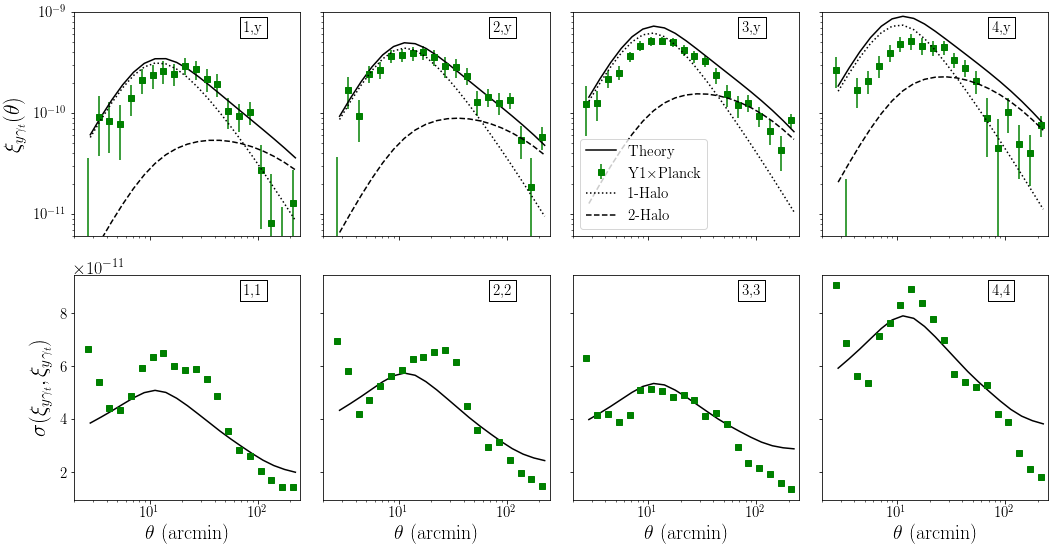

In [101]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
            wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            ax[j1,j2].errorbar(theta, wtheta_ygt,  ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label=r'Y1$\times$Planck')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k',label=r'1-Halo')
            ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k',label=r'2-Halo')
            ax[j1,j2].set_ylim(6e-12,1e-9)
            
            
            
        if j1 == 1:
            wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            ax[j1,j2].plot(theta, sig_bl , ls='-',color='k',label='Theory')

            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label=r'Y1$\times$Planck')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 0:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,5,10,30,100,200])
#             labels_bottom = ticks
#             ax[0,j2].set_xticks(ticks)
#             ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
ax[0,2].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins.pdf')
# fig.savefig('xi_ygt_allbins_wtheory.png',dpi=240)
fig.savefig('xi_ygt_allbins_wtheory.pdf')












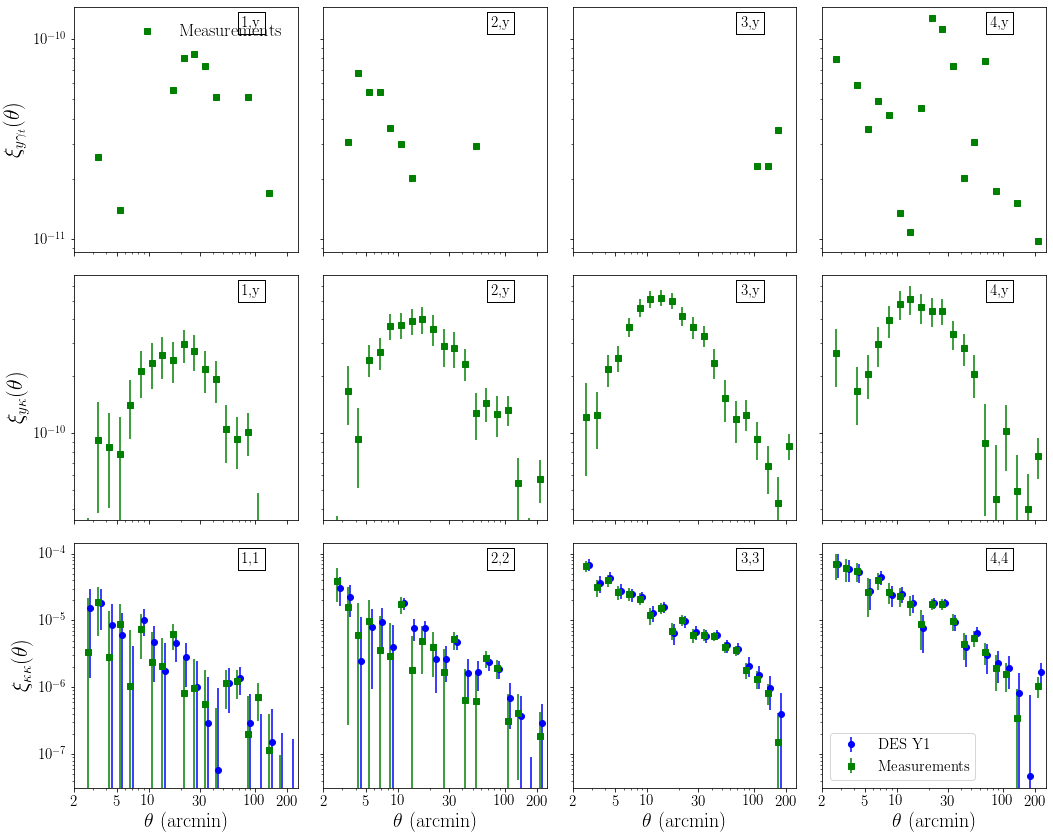

In [46]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(3,4, figsize = (15,12),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(3):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        sig = np.sqrt(np.diag(cov))

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
#             wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#             theta_rad_bl = block_res['theory_theta_rad']
#             theta_bl = theta_rad_bl * 180. * 60./np.pi
#             sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].errorbar(theta, wtheta_ygt, sig_bl , ls='-',color='k')
            yk_g = df['Yshear_y1'][str(j2)]['xim']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180. /np.pi
#             yk_err = df['Yshear_y1'][str(j2)]['err']
            ax[j1,j2].plot(yk_th_g, yk_g, ls='',marker='s',color='green',label='Measurements')

        if j1 == 1:
            wt_cov_G_bl = block_res['real_covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180. /np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            
#             ax[j1,j2].errorbar(theta, wtheta_yk, sig_bl , ls='-',color='k')
            
            
            
        if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk , ls='-',color='k',label='Theory')
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
            ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
        ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[2,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')












SNR kk bin:1=5.02 sigma
SNR kk bin:2=8.97 sigma
SNR kk bin:3=13.14 sigma
SNR kk bin:4=10.92 sigma


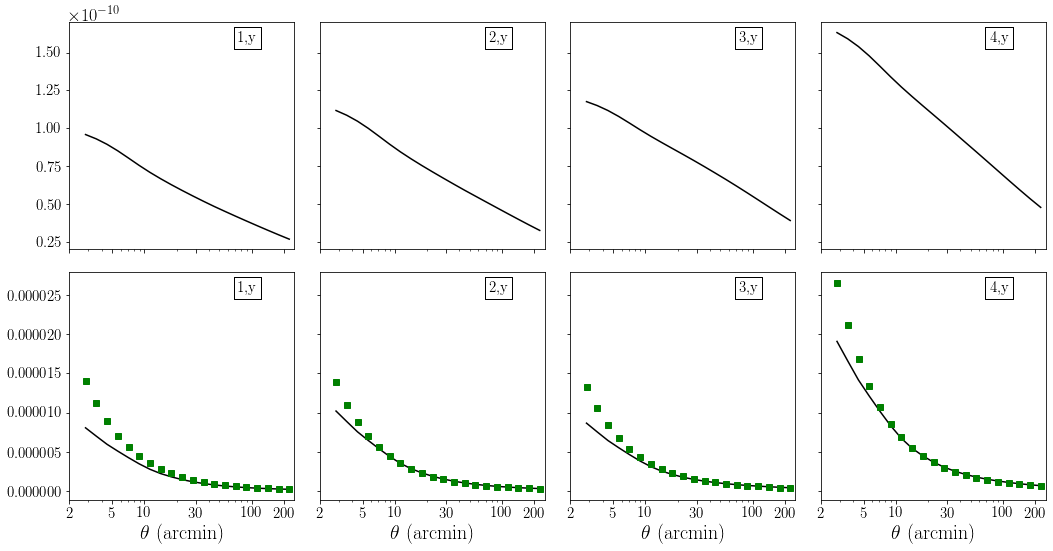

In [132]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
#         print(sig)
#         import pdb;pdb.set_trace()
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin:' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

        

#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
            wt_cov_G_bl = block_res['real_covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].plot(theta, wtheta_yk/sig_bl , ls='-',color='k')
            ax[j1,j2].plot(theta, sig_bl , ls='-',color='k')    
        if j1 == 1:
            wt_cov_G_bl = block_res['real_covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].plot(theta, wtheta_kk/sig_bl , ls='-',color='k',label='Theory')
#             ax[j1,j2].plot(data_ang, data_val/sig, ls='',marker='s',color='green',label='DES Y1')
            ax[j1,j2].plot(theta, sig_bl , ls='-',color='k',label='Theory')
            ax[j1,j2].plot(data_ang, sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
#         ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
# ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[2,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_kk_allbins.pdf')












SNR kk bin1=5.02 sigma
SNR y-gt bin1=8.32 sigma
SNR theory y-gt bin1=10.87 sigma
SNR theory yk bin1=10.91 sigma
SNR Cl theory yk bin1=6.78 sigma
SNR Gaussian Cl theory yk bin1=10.95 sigma
SNR kk bin2=8.97 sigma
SNR y-gt bin2=11.56 sigma
SNR theory y-gt bin2=13.15 sigma
SNR theory yk bin2=13.17 sigma
SNR Cl theory yk bin2=8.48 sigma
SNR Gaussian Cl theory yk bin2=13.23 sigma
SNR kk bin3=13.14 sigma
SNR y-gt bin3=15.04 sigma
SNR theory y-gt bin3=19.18 sigma
SNR theory yk bin3=19.14 sigma
SNR Cl theory yk bin3=11.97 sigma
SNR Gaussian Cl theory yk bin3=19.25 sigma
SNR kk bin4=10.92 sigma
SNR y-gt bin4=10.97 sigma
SNR theory y-gt bin4=16.56 sigma
SNR theory yk bin4=16.54 sigma
SNR Cl theory yk bin4=11.89 sigma
SNR Gaussian Cl theory yk bin4=16.63 sigma


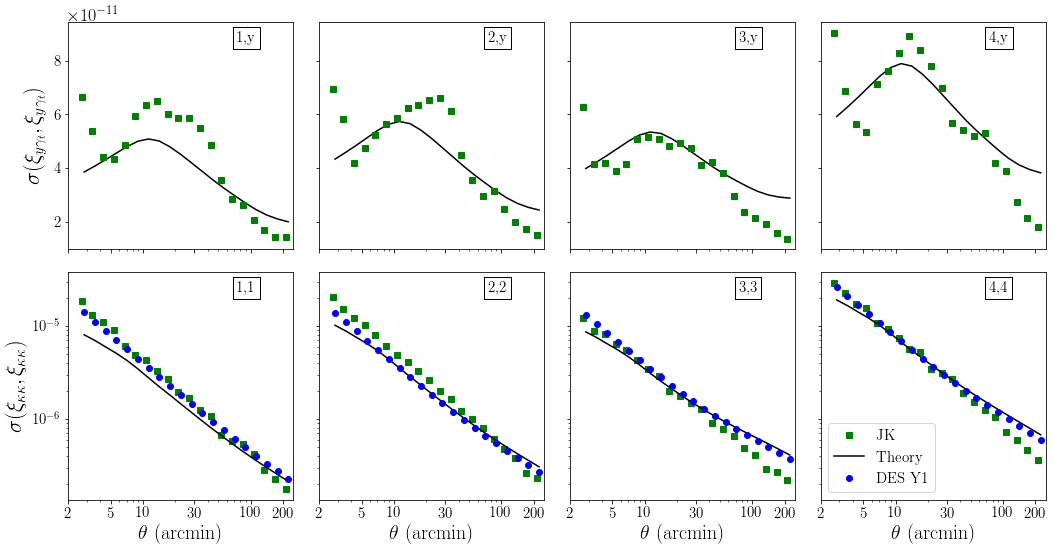

In [90]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
    
#         wtheta_yk_1h = wtheta_yk_dict[ str(bins[jc]) + '-1h'] 
#         wtheta_yk_2h = wtheta_yk_dict[ str(bins[jc]) + '-2h'] 
        wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
        wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
        wtheta_kk = wtheta_kk_dict[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict['theta_arcmin']
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
        
        
        
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))
        if j1 == 0:
            inv_cov_bin = QR_inverse(cov)
            Cl_kk_bin = data_val
            snr_bin = np.sqrt(np.dot(np.array([Cl_kk_bin]), np.dot(inv_cov_bin, np.array([Cl_kk_bin]).T)))
            print('SNR kk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            

        
    
#         ax[j1,j2].plot(theta, wtheta_yg_1h , ls='--',color='red',label='1-halo')
#         ax[j1,j2].plot(theta, wtheta_yg_2h , ls=':',color='blue',label='2-halo')
        if j1 == 0:
            wt_cov_G_bl = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
            ax[j1,j2].plot(theta, sig_bl , ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            wtheta_ygt = wtheta_ygt_dict[ str(bins[j2]) + '-tot']
            yk_cov = block_res['real_covg_gty_gty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([wtheta_ygt]), np.dot(inv_cov_bin, np.array([wtheta_ygt]).T)))
            print('SNR theory y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

            wtheta_yk = wtheta_yk_dict[ str(bins[j2]) + '-tot']
            yk_cov = block_res['real_covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([wtheta_yk]), np.dot(inv_cov_bin, np.array([wtheta_yk]).T)))
            print('SNR theory yk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

            wtheta_yk = block_res['theory_clky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            yk_cov = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([wtheta_yk]), np.dot(inv_cov_bin, np.array([wtheta_yk]).T)))
            print('SNR Cl theory yk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

            wtheta_yk = block_res['theory_clky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            yk_cov = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([wtheta_yk]), np.dot(inv_cov_bin, np.array([wtheta_yk]).T)))
            print('SNR Gaussian Cl theory yk bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            wt_cov_G_bl = block_res['real_covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta_rad_bl = block_res['theory_theta_rad']
            theta_bl = theta_rad_bl * 180. * 60./np.pi
            sig_bl = np.sqrt(np.diag(wt_cov_G_bl))
#             ax[j1,j2].plot(theta, wtheta_kk/sig_bl , ls='-',color='k',label='Theory')
#             ax[j1,j2].plot(data_ang, data_val/sig, ls='',marker='s',color='green',label='DES Y1')
            ax[j1,j2].plot(theta, sig_bl , ls='-',color='k',label='Theory')
            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y1')


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 1:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_ygt_kk_allbins_err_comp.pdf')













In [6]:
f_rm = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_redmagic_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'),encoding='latin1')

f_ml = pk.load(open('/Users/shivam/Downloads/cls_20200116_DES_maglim_v2.2_v6.22.2_ACT_y_20191209_v2-wmap_nside4096.pickle','rb'),encoding='latin1')





In [7]:
f_rm.keys(), f_ml.keys()



(dict_keys(['ell', ('ymap', 'ymap'), ('galaxy_density', 'ymap'), ('galaxy_density', 'galaxy_density')]),
 dict_keys(['ell', ('ymap', 'ymap'), ('galaxy_density', 'ymap'), ('galaxy_density', 'galaxy_density')]))

In [9]:
f_rm[('galaxy_density','galaxy_density')].keys()



dict_keys([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5)])

In [10]:
f_ml[('galaxy_density','galaxy_density')].keys()




dict_keys([(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6)])

In [11]:
f_rm[('galaxy_density','galaxy_density')][(0,0)]



{'data': array([[1.68449749e-05, 9.14972745e-06, 7.48971372e-06, 6.82266658e-06,
         6.29841647e-06, 6.05106357e-06, 5.88168325e-06, 5.61765416e-06,
         5.49484891e-06, 5.36298328e-06, 5.31483301e-06, 5.24671556e-06,
         5.16875571e-06, 5.16991337e-06, 5.10575687e-06, 5.11039485e-06,
         5.08237326e-06, 5.09281459e-06, 5.11248675e-06, 5.14559484e-06,
         5.14610565e-06, 5.19377532e-06, 5.20160816e-06, 5.38065444e-06]]),
 'random': array([[[4.08428084e-06, 4.09055071e-06, 4.05705065e-06, 4.06769447e-06,
          4.07324699e-06, 4.13205937e-06, 4.16646236e-06, 4.17171575e-06,
          4.20280634e-06, 4.20774751e-06, 4.25075616e-06, 4.27960633e-06,
          4.24720053e-06, 4.32722150e-06, 4.34786076e-06, 4.39149892e-06,
          4.41885618e-06, 4.46412497e-06, 4.50834841e-06, 4.61492747e-06,
          4.62037891e-06, 4.70662015e-06, 4.72941187e-06, 4.90067824e-06]],
 
        [[4.16292983e-06, 4.04873818e-06, 4.15023361e-06, 4.07423162e-06,
          4.0833446

In [140]:
ukl = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/uk_l_z_.npz')
ugl = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/ug_l_z_.npz')



In [153]:
ell_array_str = ukl.files
hmf_f = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/test/dndm_bm_pk_.npz')
# hmf_f.files
M_array = hmf_f['M_array']


In [175]:
M1 = 1e10
M2 = 1e13
M3 = 1e15
ind1 = np.where(M_array > M1)[0][0]
ind2 = np.where(M_array > M2)[0][0]
ind3 = np.where(M_array > M3)[0][0]




In [176]:
np.log10(M_array[ind2])


13.070351758793969

In [177]:
ukl_fM = []
ugl_fM = []
ell_array = []
for ell in ell_array_str:
    ukl_fM.append(ukl[ell][0,ind2])
    ugl_fM.append(ugl[ell][0,ind2])
    ell_array.append(float(ell))
    

    

In [180]:
ell = 1000
ell_array = np.array(ell_array)
ind_l = np.where(ell_array > ell)[0][0]



In [181]:
ukM_fl = ukl[str(ell_array[ind_l])][0,:]
ugM_fl = ugl[str(ell_array[ind_l])][0,:]


    
    

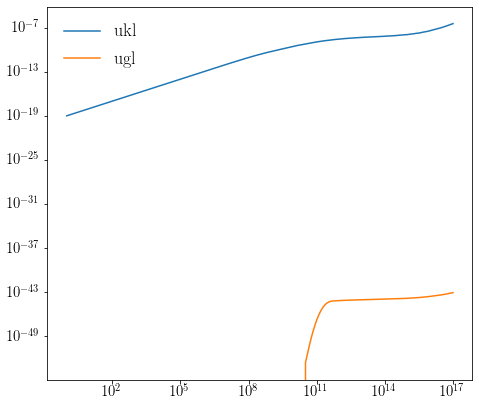

In [182]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(M_array,  ukM_fl,label='ukl')
ax.plot(M_array,  ugM_fl,label='ugl')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlabel(r'$\theta$', size = 18)
# ax.set_ylabel(r'$\sigma(\gamma_t,\gamma_t)$ ratio', size = 20)
# ax.set_ylim(1e-1,2e5)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()




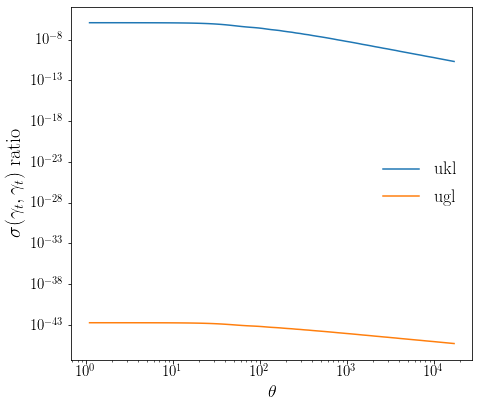

In [178]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(ell_array,  ukl_fM,label='ukl')
ax.plot(ell_array,  ugl_fM,label='ugl')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlabel(r'$\theta$', size = 18)
# ax.set_ylabel(r'$\sigma(\gamma_t,\gamma_t)$ ratio', size = 20)
# ax.set_ylim(1e-1,2e5)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()








In [165]:
ell = block_res['theory_ell']
Cl_gy1h = block_res['theory_clgy1h_bin_1_1']
Cl_ky1h = block_res['theory_clky1h_bin_1_1']



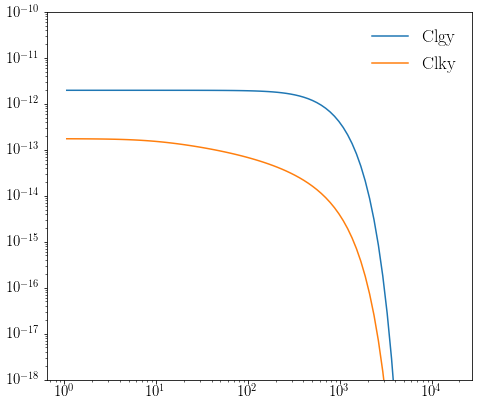

In [168]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(ell,  Cl_gy1h,label='Clgy')
ax.plot(ell,  Cl_ky1h,label='Clky')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlabel(r'$\theta$', size = 18)
# ax.set_ylabel(r'$\sigma(\gamma_t,\gamma_t)$ ratio', size = 20)
ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()









In [74]:
clf.keys()


dict_keys(['ell', ('ymap', 'ymap'), ('galaxy_density', 'ymap'), ('galaxy_density', 'galaxy_density')])

In [41]:
binv = 1
clf[('galaxy_density', 'galaxy_density')][(binv - 1, binv - 1)].keys()


dict_keys(['data', 'random'])

In [43]:
clf[('ymap', 'ymap')][('y', 'y')]['data']


array([[1.04782169e-16, 4.87416393e-17, 3.96270172e-17, 3.74781200e-17,
        3.31500319e-17, 3.41091888e-17, 3.11953485e-17, 2.58131854e-17,
        2.22047424e-17, 1.89480472e-17, 1.44888927e-17, 1.10900854e-17,
        8.24018851e-18, 6.17481357e-18, 4.80193947e-18, 4.11183534e-18,
        3.66412784e-18, 3.41265553e-18, 3.32205264e-18, 3.24848459e-18,
        3.28047480e-18, 3.37702340e-18, 3.45481527e-18, 3.74456906e-18]])

In [45]:
clf[('galaxy_density', 'ymap')].keys()


dict_keys([(0, 'y'), (1, 'y'), (2, 'y'), (3, 'y'), (4, 'y'), (5, 'y'), (6, 'y')])

In [46]:
clf.keys()


dict_keys(['ell', ('ymap', 'ymap'), ('galaxy_density', 'ymap'), ('galaxy_density', 'galaxy_density')])

In [47]:
clf['ell']

array([ 199.5,  399.5,  599.5,  799.5,  999.5, 1199.5, 1399.5, 1599.5,
       1799.5, 1999.5, 2199.5, 2399.5, 2599.5, 2799.5, 2999.5, 3199.5,
       3399.5, 3599.5, 3799.5, 3999.5, 4199.5, 4399.5, 4599.5, 4799.5])

In [48]:
import pickle as pk
import numpy as np
import scipy as sp
import scipy.special as spsp
import matplotlib.pyplot as plt
import matplotlib
import pdb

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

from matplotlib.colors import ListedColormap
import matplotlib.cm         as cm
import matplotlib.mlab       as mlab
import matplotlib.gridspec   as gridspec
import matplotlib.lines      as mlines
import matplotlib.patches    as mpatches
import matplotlib.ticker     as ticker
import matplotlib.transforms as transform
from matplotlib.colors import LinearSegmentedColormap
import sys,os
sys.path.insert(0,'/Users/shivam/Dropbox/Research/SNe_H0/SN_SLTD_comp/code/')
from color_utilities import *




/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  # Remove the CWD from sys.path while we load stuff.


In [58]:
def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr



-50.0 -20.271629808170797
(89, 89)
-50.0 50.0


/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


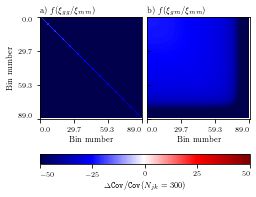

In [57]:
x_size        = 8.56 # PRD one column
y_size        = 7.0
main_fontsize = 8.0

# initial setup:
fig = plt.gcf()
gs = gridspec.GridSpec(2,2,height_ratios=[15,1])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
cbar_ax = plt.subplot(gs[1,:])
fig.set_size_inches( x_size/2.54, y_size/2.54 )

# create the colormap:
nice_colormap = 'summer_sky'
colors        = [ nice_colors(i,colormap=nice_colormap) for i in np.linspace(0.0,2.5,100) ]
# color_map     = ListedColormap(colors)
color_map     = plt.get_cmap('seismic')
# yk_cov = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
binv = 4
im1mat = np.log10(block_res['covg_ky_ky_bin_' + str(binv) + '_' + str(binv)] + 1e-50)
im2mat = np.log10(block_res['covng_ky_ky_bin_' + str(binv) + '_' + str(binv)] + 1e-50)

min_corr = np.min(np.array([np.amin(im1mat),np.amin(im2mat)]))
max_corr = np.max(np.array([np.amax(im1mat),np.amax(im2mat)]))
print(min_corr, max_corr)
if np.abs(min_corr) > max_corr:
    xminv = min_corr
    xmaxv = np.abs(min_corr)
else:
    xminv = -1. * max_corr
    xmaxv = max_corr

# im1 = ax1.imshow( get_corr(xi_gg_mm_cov_bin[300]), vmin=min_corr, vmax=max_corr, cmap=color_map )
# im2 = ax2.imshow( get_corr(xi_gg_mm_cov_bin[500]), vmin=min_corr, vmax=max_corr, cmap=color_map )

im1 = ax1.imshow( im1mat, vmin=xminv, vmax=xmaxv, cmap=color_map )
im2 = ax2.imshow( im2mat, vmin=xminv, vmax=xmaxv, cmap=color_map )

print(im1mat.shape)
# ax1.axvline(x=ind_4-0.4,ymin =1.-ind_4/19.5,ymax=1.-ind_40/20.,lw=1.,color='k',ls='--' )
# ax1.axvline(x=ind_40-0.4,ymin =1.-ind_4/19.5,ymax=1.-ind_40/20. ,lw=1.,color='k',ls='--')

# ax1.axhline(y=ind_4-0.4,xmin =-0.02+ind_4/19.5,xmax=-0.02+ind_40/19.5,lw=1.,color='k',ls='--' )
# ax1.axhline(y=ind_40-0.4,xmin =-0.02+ind_4/19.5,xmax=-0.02+ind_40/19.5 ,lw=1.,color='k',ls='--')

# label on the axis:
ax1.set_xlabel('Bin number', fontsize=main_fontsize);
ax2.set_xlabel('Bin number', fontsize=main_fontsize);
ax1.set_ylabel('Bin number', fontsize=main_fontsize);

# limits:
len_el = im1mat.shape[0]
for _ax in [ax1,ax2]:
    _ax.set_xlim([0.0,len_el+0.5])
    _ax.set_ylim([len_el+0.5,0.0])

# the x ticks:
ticks  = np.around(np.linspace(0.0,len_el,4),1)
labels = ticks
# print(len_el, ind_4, ind_40)
# ticks  = [0,3,6,9,11.5]
# labels = ['1','3','6','9','12']

# labels = ['4','8','12','16','20']
for _ax in [ax1,ax2]:
    _ax.set_xticks(ticks);
    _ax.set_xticklabels( labels, horizontalalignment='center', fontsize=0.9*main_fontsize);
    _ax.xaxis.get_majorticklabels()[-1].set_horizontalalignment('right');
    _ax.xaxis.get_majorticklabels()[0].set_horizontalalignment('left');

# the y ticks:
# ticks  = [ 0.0, 5, 10, 15, 19.5 ]
# labels = ['1','5','10','15','20']
ax1.set_yticks(ticks);
ax1.set_yticklabels(labels, horizontalalignment='right', fontsize=0.9*main_fontsize);
ax1.get_yticklabels()[0].set_verticalalignment('top')
ax1.get_yticklabels()[-1].set_verticalalignment('bottom')

ax2.set_yticks(ticks);
ax2.set_yticklabels( [], horizontalalignment='center', fontsize=0.9*main_fontsize);
ax2.tick_params(axis='y', which='both', direction='in', labelleft=False, labelright=False, labelsize=0.9*main_fontsize)

# titles:
ax1.text( 0.0,1.02,r'a) $f(\xi_{gg}/\xi_{mm})$', verticalalignment='bottom', horizontalalignment='left', transform=ax1.transAxes, fontsize=main_fontsize)
ax2.text( 0.0,1.02,r'b) $f(\xi_{gm}/\xi_{mm})$', verticalalignment='bottom', horizontalalignment='left', transform=ax2.transAxes, fontsize=main_fontsize)

# color bar:
# cbar = fig.colorbar( im1, cax=cbar_ax, orientation='horizontal', fraction=0.2, anchor=(0.5,0.8))
cbar = fig.colorbar( im1, cax=cbar_ax, orientation='horizontal')
cbar.solids.set_edgecolor("face")
# colorbar labels:
# cbar.set_ticks([0.2,0.4,0.6,0.8,1.0])
# cbar.set_ticklabels(['0.2','0.4','0.6','0.8','1.0'])


cbar_ticks = np.around(np.linspace(xminv,xmaxv,5),1)
cbar.set_ticks(cbar_ticks)
print(cbar_ticks[0], cbar_ticks[-1])
# cbar.set_ticklabels(cbar_ticks)
cbar.set_clim(cbar_ticks[0],cbar_ticks[-1])
cbar.ax.tick_params(labelsize=0.9*main_fontsize)
cbar.ax.get_xmajorticklabels()[-1].set_horizontalalignment('right');
cbar.ax.get_xmajorticklabels()[0].set_horizontalalignment('left');
cbar.ax.set_xlabel(r'$\Delta \texttt{Cov}/\texttt{Cov}(N_{jk}=300)$',fontsize=main_fontsize)

# dimensions:
bottom=0.15; top=0.99; left=0.13; right=0.995; wspace=0.05; hspace=0.2
gs.update( bottom=bottom, top=top, left=left, right=right, wspace=wspace, hspace=hspace )
plt.savefig('cov_compare_g_ng.pdf')
# plt.close('all')



In [69]:
np.diag(block_res['covng_ky_ky_bin_' + str(binv) + '_' + str(binv)])/np.diag(block_res['covg_ky_ky_bin_' + str(binv) + '_' + str(binv)])




array([2.17718335e-003, 2.60090425e-003, 3.10798297e-003, 3.71231360e-003,
       4.42875606e-003, 5.27304160e-003, 6.25997456e-003, 7.40289861e-003,
       8.71158070e-003, 1.01906335e-002, 1.18372663e-002, 1.36395192e-002,
       1.55747499e-002, 1.76088424e-002, 1.96965100e-002, 2.17832241e-002,
       2.38094932e-002, 2.57181891e-002, 2.74647385e-002, 2.90277158e-002,
       3.04159379e-002, 3.16683781e-002, 3.28455216e-002, 3.40158782e-002,
       3.52435024e-002, 3.65616273e-002, 3.77654546e-002, 3.93972510e-002,
       4.09717471e-002, 4.13051228e-002, 4.60064016e-002, 4.91558038e-002,
       5.23902856e-002, 5.60376721e-002, 6.01110872e-002, 6.46134731e-002,
       6.95381135e-002, 7.48727993e-002, 8.06062714e-002, 8.67312021e-002,
       9.32407589e-002, 1.00114679e-001, 1.07298445e-001, 1.14682975e-001,
       1.22098988e-001, 1.29333736e-001, 1.36183355e-001, 1.42493660e-001,
       1.48171460e-001, 1.53144898e-001, 1.57322911e-001, 1.60612085e-001,
       1.62947365e-001, 1

0.0 1.0
(89, 89)
0.0 1.0


/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:102: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


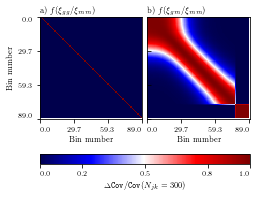

In [68]:
x_size        = 8.56 # PRD one column
y_size        = 7.0
main_fontsize = 8.0

# initial setup:
fig = plt.gcf()
gs = gridspec.GridSpec(2,2,height_ratios=[15,1])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
cbar_ax = plt.subplot(gs[1,:])
fig.set_size_inches( x_size/2.54, y_size/2.54 )

# create the colormap:
nice_colormap = 'summer_sky'
colors        = [ nice_colors(i,colormap=nice_colormap) for i in np.linspace(0.0,2.5,100) ]
# color_map     = ListedColormap(colors)
color_map     = plt.get_cmap('seismic')
# yk_cov = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
binv = 4
im1mat = get_corr(block_res['covg_ky_ky_bin_' + str(binv) + '_' + str(binv)])
im2mat = get_corr(block_res['covng_ky_ky_bin_' + str(binv) + '_' + str(binv)] + 1e-50 )

min_corr = np.min(np.array([np.amin(im1mat),np.amin(im2mat)]))
max_corr = np.max(np.array([np.amax(im1mat),np.amax(im2mat)]))
print(min_corr, max_corr)
# if np.abs(min_corr) > max_corr:
#     xminv = min_corr
#     xmaxv = np.abs(min_corr)
# else:
#     xminv = -1. * max_corr
#     xmaxv = max_corr
xminv = 0
xmaxv = 1

# im1 = ax1.imshow( get_corr(xi_gg_mm_cov_bin[300]), vmin=min_corr, vmax=max_corr, cmap=color_map )
# im2 = ax2.imshow( get_corr(xi_gg_mm_cov_bin[500]), vmin=min_corr, vmax=max_corr, cmap=color_map )

im1 = ax1.imshow( im1mat, vmin=xminv, vmax=xmaxv, cmap=color_map )
im2 = ax2.imshow( im2mat, vmin=xminv, vmax=xmaxv, cmap=color_map )

print(im1mat.shape)
# ax1.axvline(x=ind_4-0.4,ymin =1.-ind_4/19.5,ymax=1.-ind_40/20.,lw=1.,color='k',ls='--' )
# ax1.axvline(x=ind_40-0.4,ymin =1.-ind_4/19.5,ymax=1.-ind_40/20. ,lw=1.,color='k',ls='--')

# ax1.axhline(y=ind_4-0.4,xmin =-0.02+ind_4/19.5,xmax=-0.02+ind_40/19.5,lw=1.,color='k',ls='--' )
# ax1.axhline(y=ind_40-0.4,xmin =-0.02+ind_4/19.5,xmax=-0.02+ind_40/19.5 ,lw=1.,color='k',ls='--')

# label on the axis:
ax1.set_xlabel('Bin number', fontsize=main_fontsize);
ax2.set_xlabel('Bin number', fontsize=main_fontsize);
ax1.set_ylabel('Bin number', fontsize=main_fontsize);

# limits:
len_el = im1mat.shape[0]
for _ax in [ax1,ax2]:
    _ax.set_xlim([0.0,len_el+0.5])
    _ax.set_ylim([len_el+0.5,0.0])

# the x ticks:
ticks  = np.around(np.linspace(0.0,len_el,4),1)
labels = ticks
# print(len_el, ind_4, ind_40)
# ticks  = [0,3,6,9,11.5]
# labels = ['1','3','6','9','12']

# labels = ['4','8','12','16','20']
for _ax in [ax1,ax2]:
    _ax.set_xticks(ticks);
    _ax.set_xticklabels( labels, horizontalalignment='center', fontsize=0.9*main_fontsize);
    _ax.xaxis.get_majorticklabels()[-1].set_horizontalalignment('right');
    _ax.xaxis.get_majorticklabels()[0].set_horizontalalignment('left');

# the y ticks:
# ticks  = [ 0.0, 5, 10, 15, 19.5 ]
# labels = ['1','5','10','15','20']
ax1.set_yticks(ticks);
ax1.set_yticklabels(labels, horizontalalignment='right', fontsize=0.9*main_fontsize);
ax1.get_yticklabels()[0].set_verticalalignment('top')
ax1.get_yticklabels()[-1].set_verticalalignment('bottom')

ax2.set_yticks(ticks);
ax2.set_yticklabels( [], horizontalalignment='center', fontsize=0.9*main_fontsize);
ax2.tick_params(axis='y', which='both', direction='in', labelleft=False, labelright=False, labelsize=0.9*main_fontsize)

# titles:
ax1.text( 0.0,1.02,r'a) $f(\xi_{gg}/\xi_{mm})$', verticalalignment='bottom', horizontalalignment='left', transform=ax1.transAxes, fontsize=main_fontsize)
ax2.text( 0.0,1.02,r'b) $f(\xi_{gm}/\xi_{mm})$', verticalalignment='bottom', horizontalalignment='left', transform=ax2.transAxes, fontsize=main_fontsize)

# color bar:
# cbar = fig.colorbar( im1, cax=cbar_ax, orientation='horizontal', fraction=0.2, anchor=(0.5,0.8))
cbar = fig.colorbar( im1, cax=cbar_ax, orientation='horizontal')
cbar.solids.set_edgecolor("face")
# colorbar labels:
# cbar.set_ticks([0.2,0.4,0.6,0.8,1.0])
# cbar.set_ticklabels(['0.2','0.4','0.6','0.8','1.0'])


cbar_ticks = np.around(np.linspace(xminv,xmaxv,5),1)
cbar.set_ticks(cbar_ticks)
print(cbar_ticks[0], cbar_ticks[-1])
# cbar.set_ticklabels(cbar_ticks)
cbar.set_clim(cbar_ticks[0],cbar_ticks[-1])
cbar.ax.tick_params(labelsize=0.9*main_fontsize)
cbar.ax.get_xmajorticklabels()[-1].set_horizontalalignment('right');
cbar.ax.get_xmajorticklabels()[0].set_horizontalalignment('left');
cbar.ax.set_xlabel(r'$\Delta \texttt{Cov}/\texttt{Cov}(N_{jk}=300)$',fontsize=main_fontsize)

# dimensions:
bottom=0.15; top=0.99; left=0.13; right=0.995; wspace=0.05; hspace=0.2
gs.update( bottom=bottom, top=top, left=left, right=right, wspace=wspace, hspace=hspace )
plt.savefig('corr_compare_g_ng.pdf')
# plt.close('all')





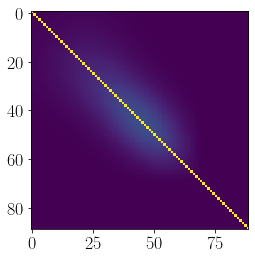

In [72]:
binv = 1
im1mat = get_corr(block_res['covg_ky_ky_bin_' + str(binv) + '_' + str(binv)] + block_res['covng_ky_ky_bin_' + str(binv) + '_' + str(binv)])

plt.figure()
plt.imshow(im1mat)


In [3]:
wtheta_yk_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_acty3_beamed.npz')
wtheta_ygt_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_acty3_beamed.npz')
wtheta_kk_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_acty3_beamed.npz')


wtheta_yk_dict_plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_plancky3_beamed.npz')
wtheta_ygt_dict_plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_plancky3_beamed.npz')
wtheta_kk_dict_plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_plancky3_beamed.npz')




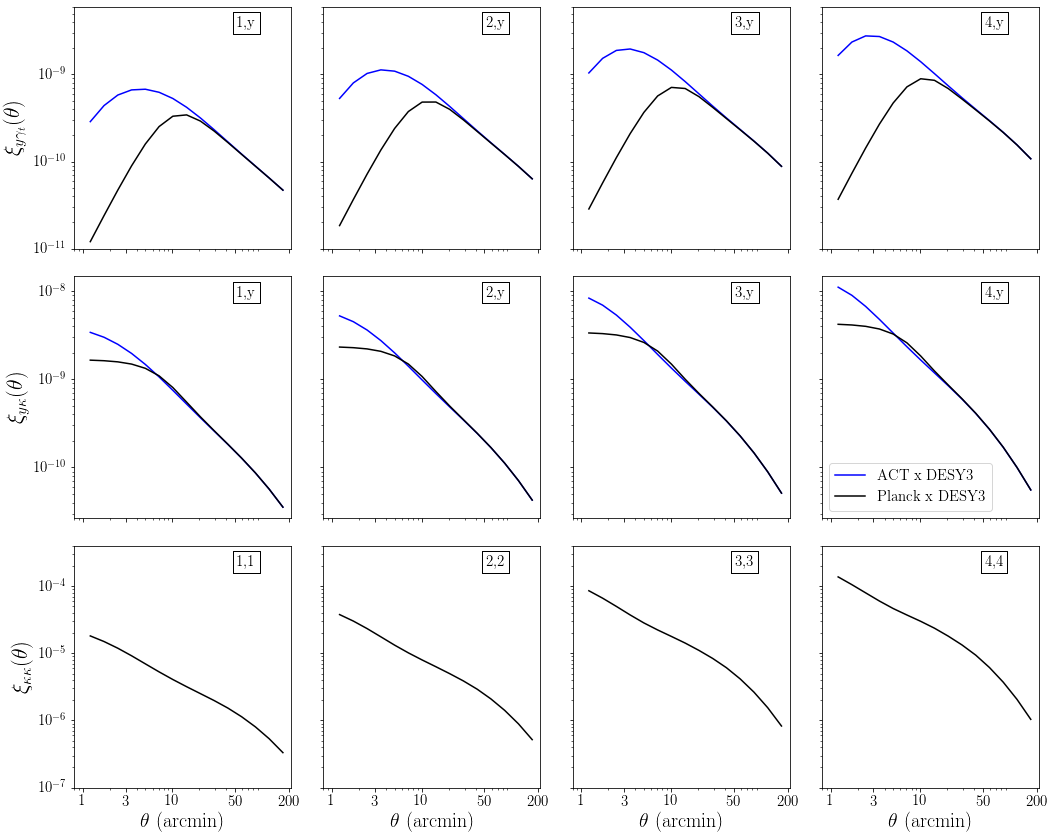

In [4]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(3,4, figsize = (15,12),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(3):    
    for j2 in range(4):

        wtheta_yk_acty3_beamed = wtheta_yk_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_acty3_beamed = wtheta_ygt_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_acty3_beamed = wtheta_kk_dict_acty3_beamed[ str(bins[j2]) + '-tot']



        wtheta_yk_plancky3_beamed = wtheta_yk_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_plancky3_beamed = wtheta_ygt_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_plancky3_beamed = wtheta_kk_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_plancky3_beamed['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_acty3_beamed, ls='-',color='b',label='ACT x DESY3')
            ax[j1,j2].errorbar(theta, wtheta_ygt_plancky3_beamed, ls='-',color='k',label='Planck x DESY3')

            ax[j1,j2].set_ylim(1e-11,6e-9)
        if j1 == 1:
            
            ax[j1,j2].errorbar(theta, wtheta_yk_acty3_beamed, ls='-',color='b',label='ACT x DESY3')
            ax[j1,j2].errorbar(theta, wtheta_yk_plancky3_beamed, ls='-',color='k',label='Planck x DESY3')
            
            
            
        if j1 == 2:
            ax[j1,j2].plot(theta, wtheta_kk_acty3_beamed , ls='-',color='k',label='Planck x DESY3')
            
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

            ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 2:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_yk_kk_allbins_planckvsACT.png',dpi=240)












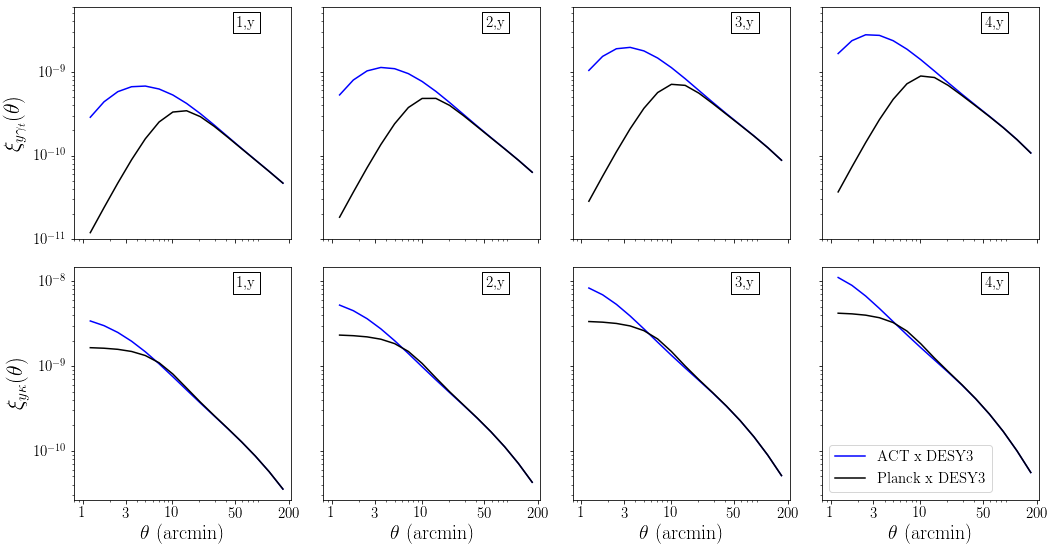

In [6]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):

        wtheta_yk_acty3_beamed = wtheta_yk_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_acty3_beamed = wtheta_ygt_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_acty3_beamed = wtheta_kk_dict_acty3_beamed[ str(bins[j2]) + '-tot']



        wtheta_yk_plancky3_beamed = wtheta_yk_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_plancky3_beamed = wtheta_ygt_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_plancky3_beamed = wtheta_kk_dict_plancky3_beamed[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_plancky3_beamed['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_acty3_beamed, ls='-',color='b',label='ACT x DESY3')
            ax[j1,j2].errorbar(theta, wtheta_ygt_plancky3_beamed, ls='-',color='k',label='Planck x DESY3')

            ax[j1,j2].set_ylim(1e-11,6e-9)
        if j1 == 1:
            
            ax[j1,j2].errorbar(theta, wtheta_yk_acty3_beamed, ls='-',color='b',label='ACT x DESY3')
            ax[j1,j2].errorbar(theta, wtheta_yk_plancky3_beamed, ls='-',color='k',label='Planck x DESY3')
            
            
            
        if j1 == 2:
            ax[j1,j2].plot(theta, wtheta_kk_acty3_beamed , ls='-',color='k',label='Planck x DESY3')
            
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

            ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_planckvsACT.png',dpi=240)
fig.savefig('xi_yk_ygt_allbins_planckvsACT.pdf')












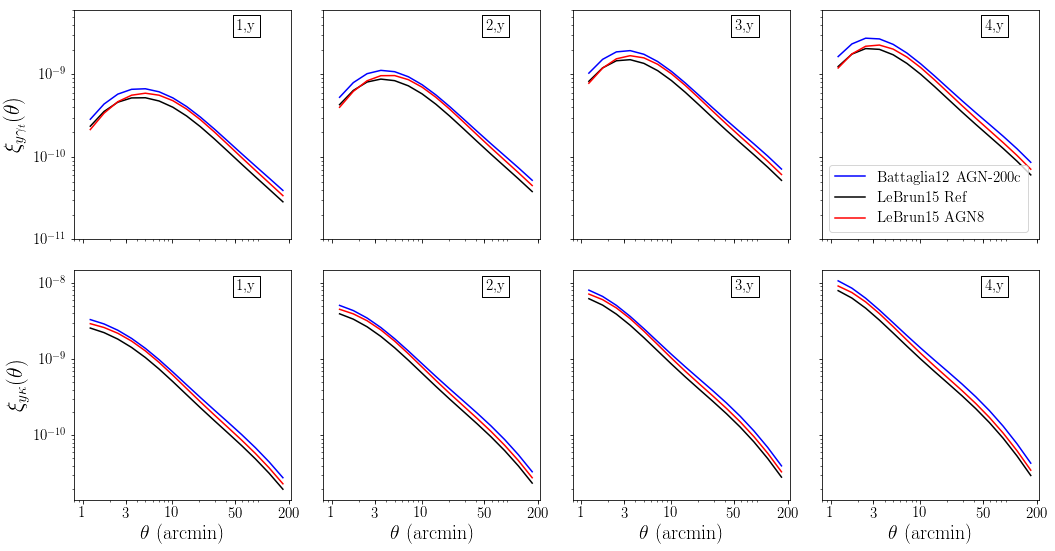

In [32]:
wtheta_yk_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_acty3_beamed_v2.npz')
wtheta_ygt_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_acty3_beamed_v2.npz')
wtheta_kk_dict_acty3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_acty3_beamed_v2.npz')



wtheta_yk_dict_acty3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_acty3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_acty3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_acty3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_acty3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_acty3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_acty3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_acty3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_acty3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_acty3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_acty3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_acty3_beamed_LeBrun_AGN8.npz')





nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):

        wtheta_yk_acty3_beamed = wtheta_yk_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_acty3_beamed = wtheta_ygt_dict_acty3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_acty3_beamed = wtheta_kk_dict_acty3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_acty3_beamed_LeBrun_Ref = wtheta_yk_dict_acty3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_acty3_beamed_LeBrun_Ref = wtheta_ygt_dict_acty3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_acty3_beamed_LeBrun_Ref = wtheta_kk_dict_acty3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        wtheta_yk_acty3_beamed_LeBrun_AGN8 = wtheta_yk_dict_acty3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_acty3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_acty3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_acty3_beamed_LeBrun_AGN8 = wtheta_kk_dict_acty3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_acty3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_acty3_beamed, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j1,j2].errorbar(theta, wtheta_ygt_acty3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j1,j2].errorbar(theta, wtheta_ygt_acty3_beamed_LeBrun_AGN8, ls='-',color='r',label='LeBrun15 AGN8')

            ax[j1,j2].set_ylim(1e-11,6e-9)
        if j1 == 1:
            
            ax[j1,j2].errorbar(theta, wtheta_yk_acty3_beamed, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j1,j2].errorbar(theta, wtheta_yk_acty3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j1,j2].errorbar(theta, wtheta_yk_acty3_beamed_LeBrun_AGN8, ls='-',color='r',label='LeBrun15 AGN8')
            
            
            
#         if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk_acty3_beamed , ls='-',color='k',label='')
            
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

#             ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[0,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_yk_ygt_allbins_model_actxy3.png',dpi=240)















SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y3 bin4=19.76 sigma


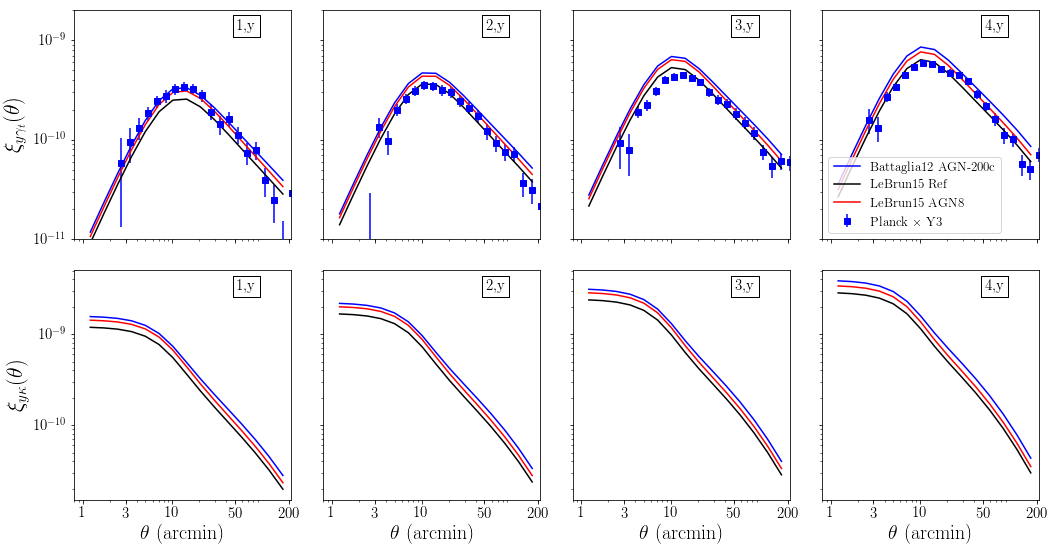

In [31]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))

wtheta_yk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_v2.npz')
wtheta_ygt_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_v2.npz')
wtheta_kk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_v2.npz')



wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_AGN8.npz')





nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j1,j2].errorbar(theta, wtheta_ygt_Plancky3_beamed, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j1,j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j1,j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_AGN8, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j1,j2].set_ylim(1e-11,2e-9)


        if j1 == 1:
            
            ax[j1,j2].errorbar(theta, wtheta_yk_Plancky3_beamed, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j1,j2].errorbar(theta, wtheta_yk_Plancky3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j1,j2].errorbar(theta, wtheta_yk_Plancky3_beamed_LeBrun_AGN8, ls='-',color='r',label='LeBrun15 AGN8')
            
            
            
#         if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk_Plancky3_beamed , ls='-',color='k',label='')
            
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

#             ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[0,3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_yk_ygt_allbins_model_planckxy3.png',dpi=240)
















In [7]:
YM_d = np.loadtxt('/Users/shivam/Downloads/lebrun_ref_model.txt')
YM_m = np.load('/Users/shivam/Downloads/YM_LeBrun_Ref.npz')



In [9]:
YM_m.keys()


['M', 'Y500']

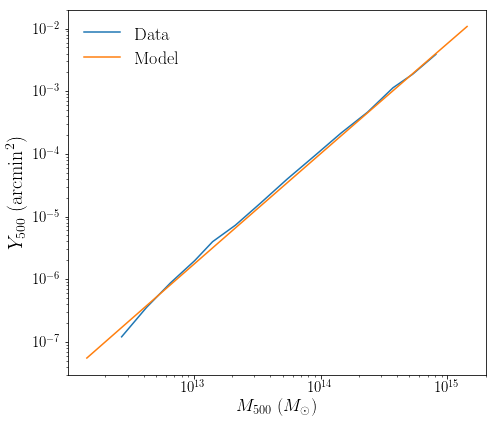

In [14]:
fig, ax = pl.subplots(1,1, figsize = (7,6))



ax.plot(YM_d[:,0],  YM_d[:,1],label='Data')
ax.plot(YM_m['M']/0.7,  YM_m['Y500'],label='Model')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{500}$ $(M_{\odot})$', size = 18)
ax.set_ylabel(r'$Y_{500}$ $(\rm{arcmin}^2)$', size = 20)
# ax.set_ylim(1e-18,1e-10)
# ax.set_xlim(2e-5,1e2)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.tick_params(axis='both', which='minor', labelsize=15)
ax.legend(fontsize = 18, frameon = False)
pl.tight_layout()










SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y3 bin4=19.76 sigma


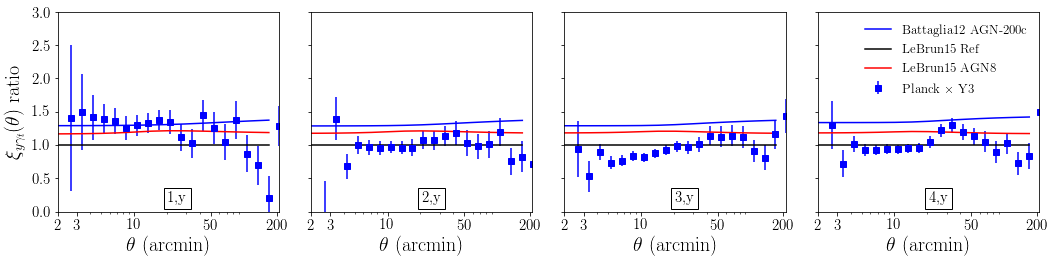

In [7]:
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')


wtheta_yk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_v2.npz')
wtheta_ygt_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_v2.npz')
wtheta_kk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_v2.npz')



wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_AGN8.npz')





nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_Ref/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_AGN8/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed_LeBrun_Ref),fill_value='extrapolate')
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data = np.exp(wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp(np.log(yk_th_g)))
            
            ax[j2].errorbar(yk_th_g, yk_g/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data,yerr=yk_err/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3') 

            ax[j2].set_ylim(0,3)

#             ax[j2].set_ylim(1e-11,2e-9)
            
            
            
#         if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk_Plancky3_beamed , ls='-',color='k',label='')
            
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

#             ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,3,10,50,200])
            labels_bottom = ticks
            ax[0].set_xticks(ticks)
            ax[0].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1].set_xticks(ticks)
            ax[1].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.5, 0.1,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ratio', size = 20)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.png',dpi=240)
fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.pdf')
















SNR y-gt Y1 bin1=8.32 sigma
SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y1 bin2=11.56 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y1 bin3=15.04 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y1 bin4=10.97 sigma
SNR y-gt Y3 bin4=19.76 sigma


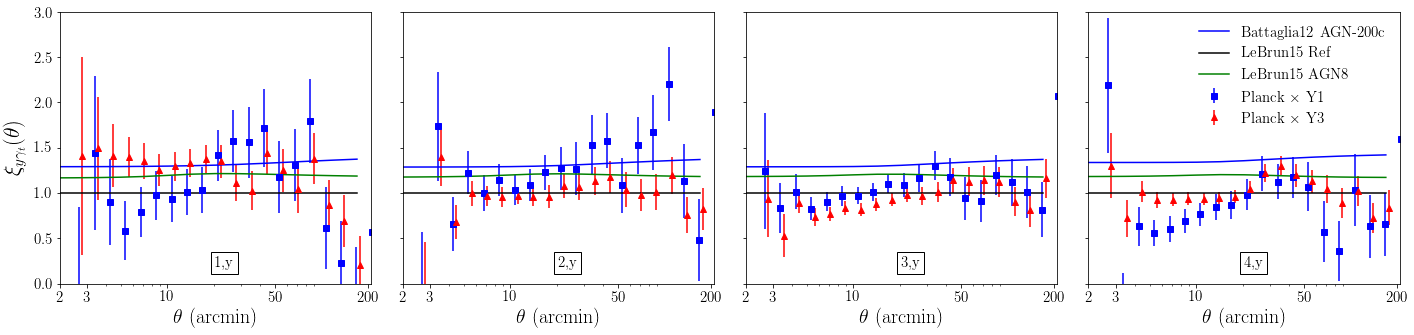

In [57]:
import scipy.interpolate as interpolate
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')


wtheta_yk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_v2.npz')
wtheta_ygt_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_v2.npz')
wtheta_kk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_v2.npz')



wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_AGN8.npz')





nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (20,5),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_Ref/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_AGN8/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='green',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y1 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed_LeBrun_Ref),fill_value='extrapolate')
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data = np.exp(wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp(np.log(yk_th_g)))
            
            ax[j2].errorbar(yk_th_g, yk_g/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data,yerr=yk_err/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data, ls='',marker='s',color='blue',label=r'Planck $\times$ Y1') 

            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            ax[j2].errorbar(yk_th_g*1.05, yk_g/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data,yerr=yk_err/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data, ls='',marker='^',color='red',label=r'Planck $\times$ Y3') 
            
            ax[j2].set_ylim(0,3)
            
            
            
#         if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk_Plancky3_beamed , ls='-',color='k',label='')
            
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

#             ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,3,10,50,200])
            labels_bottom = ticks
            ax[0].set_xticks(ticks)
            ax[0].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1].set_xticks(ticks)
            ax[1].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.5, 0.1,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=15,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_yk_ygt_allbins_model_planckxy1y3_ratio.png',dpi=240)


















In [41]:
from getdist import plots, MCSamples
def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

def get_evidence(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#log_z="):
                logz = float(ln[7:])
    return logz

# def get_param_names(filename):
#     with open(filename,"r") as fi:
#         param_names = np.array((fi.readline()[1:].split())[:-4])
#     print param_names
#     return param_names


def get_param_names(filename):
    with open(filename,"r") as fi:
        param_names = np.array((fi.readline()[1:].split()))
#     print param_names
    return param_names


def get_S8(data, names, Omega_m_name = 'cosmological_parameters--omega_m', sigma_8_name = 'COSMOLOGICAL_PARAMETERS--SIGMA_8', alpha=0.5):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [sigma_8_name]):
            sig8_ind = ii
    sigma_8 = data[:,sig8_ind]
    omega_m = data[:,Omega_m_ind]
    s8 = sigma_8 * (omega_m/0.3)**alpha
    return s8


def get_Obh2(data, names, Omega_b_name = 'cosmological_parameters--omega_b', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_b_name]):
            Omega_b_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_b = data[:,Omega_b_ind]
    return omega_b * (h0**2)

def get_Omh3(data, names, Omega_m_name = 'cosmological_parameters--omega_m', h_name = 'cosmological_parameters--h0'):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in [Omega_m_name]):
            Omega_m_ind = ii
        if (names[ii] in [h_name]):
            h_ind = ii
    h0 = data[:,h_ind]
    omega_m = data[:,Omega_m_ind]
    return omega_m * (h0**3)

def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
    return np.array(output_names), np.array(ind_data)


s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97}    
stat_vars = ['cosmological_parameters--omega_m','COSMOLOGICAL_PARAMETERS--SIGMA_8','cosmological_parameters--s8']
def get_mean_std_tension(fname, param_names=stat_vars, truth_dict=marker_dict):
    sf_name = open(fname, 'r')
    lines_all = sf_name.readlines()
    lines = lines_all[3:]
    mean_std = {}
    for j1 in range(len(param_names)):
        for i1 in range(len(lines)):
            first_line = lines[i1]
            first_line_split = first_line.split()
            sec_var = first_line_split[0]
            if sec_var == param_names[j1]:
                mean_std[sec_var] = np.array([float(first_line_split[1]),float(first_line_split[2])])
    out_dic = {}
    for param in param_names:
        mean, std = mean_std[param][0],mean_std[param][1]
        tension = np.abs(mean - truth_dict[param])/std
        out_dic[param] = tension
    
    return mean_std,out_dic



Removed no burn in
nsamp  =  55619
data shape =  (55619, 4)
weights shape =  (55619,)
param names =  ['theory_yx--p0-a_m--0' 'theory_yx--beta-a_m--0'
 'theory_yx--p0-alpha_z--0' 'theory_yx--beta-alpha_z--0']
param names fancy =  ['$P_0$' '$\\beta_0$' '$P_z$' '$\\beta_z$']


<Figure size 1152x864 with 0 Axes>

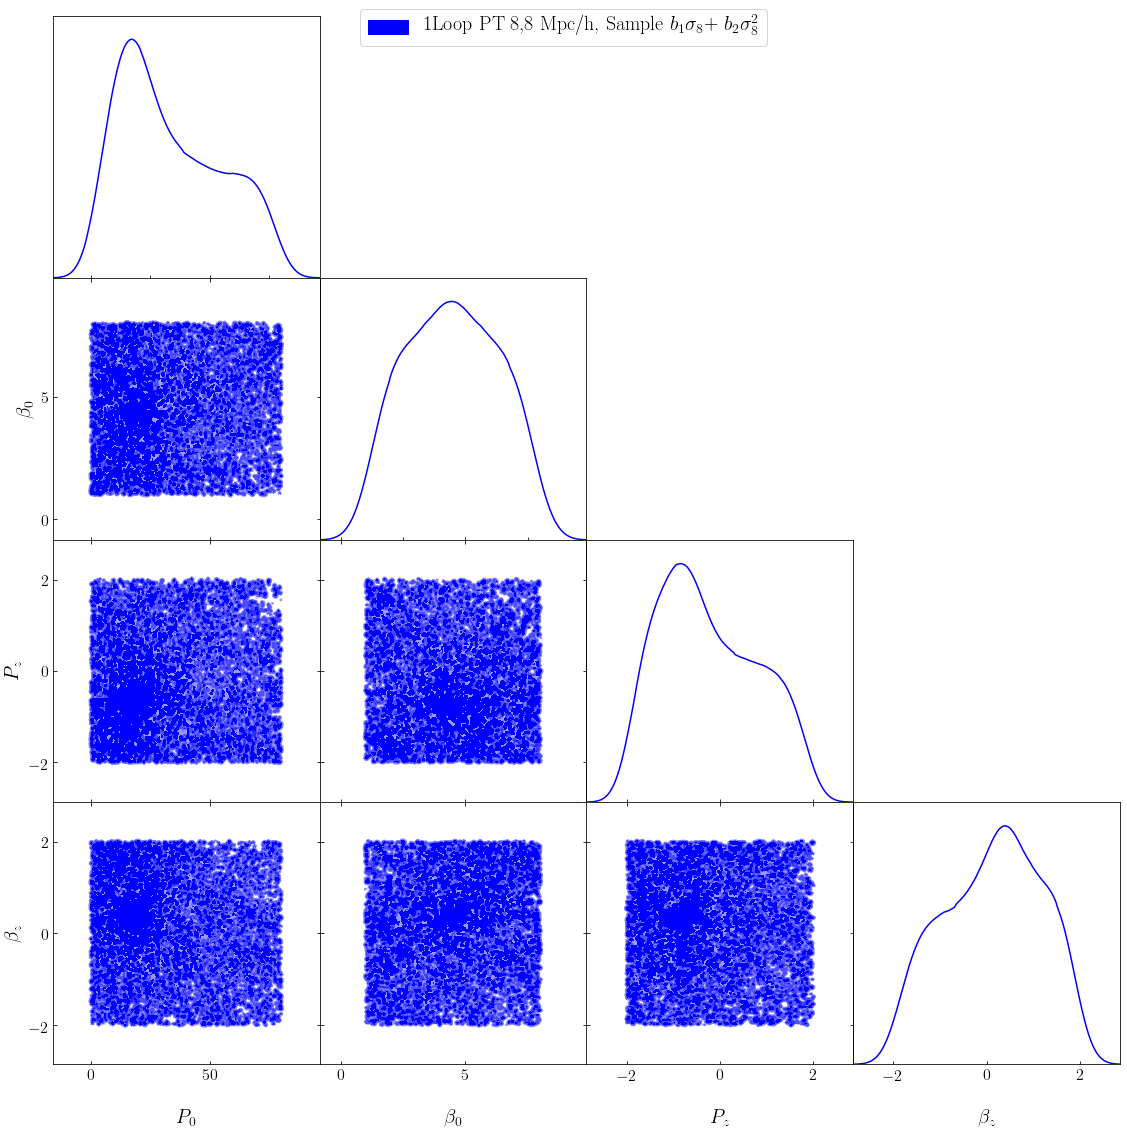

In [42]:
def replace_fancy(names, fancy_dic):
    output_names = []
    ind_data = []
    for ii in range(len(names)):
        if (names[ii] in fancy_dic):
            output_names.append(fancy_dic[names[ii]])
            ind_data.append(ii)
#         else:
#             output_names.append()
    return np.array(output_names), np.array(ind_data)

filename_list = [
'/Users/shivam/Downloads/chain_sz_shear_planckxdesy1.txt',
]     

legend_labels = ['1Loop PT 8,8 Mpc/h, Sample $b_1\sigma_8$+ $b_2\sigma^2_8$','1Loop PT 8,8 Mpc/h, Sample $b_1$+ $b_2$']
ext_b1b2 = [0,0]

all_data = []
all_samples = []

# fancy_dictionary = {'sz_like--p0-a_m':r'$P_0$', 'sz_like--beta-a_m':r'$\beta$', \
#                     'sz_like--sigma8':r'$\sigma_8$', 'sz_like--p0-alpha_z':r'$\alpha_z$', \
#                    'sz_like--alpha_p_high':r'$\alpha_{p,{\rm mid}}$', 'sz_like--alpha_p_low':r'$\alpha_{p,{\rm low}}$',\
#                    'sz_like--logm0':r'$\log M_0$','sz_like--logm1':r'$\log M_1$', 'sz_like--alpha_g':r'$\alpha_g$',
#                    'sz_like--p0-alpha_m':r'$\alpha_{p,{\rm high}}$'}

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','COSMOLOGICAL_PARAMETERS--SIGMA_8':r'$\sigma_8$','cosmological_parameters--s8':r'$S_8$','cosmological_parameters--omega_b':r'$\Omega_b$','cosmological_parameters--h0':r'$h$','cosmological_parameters--n_s':r'$n_s$'}  

fancy_dictionary = {'theory_yx--p0-a_m--0':r'$P_0$','theory_yx--beta-a_m--0':r'$\beta_0$','theory_yx--p0-alpha_z--0':r'$P_z$','theory_yx--beta-alpha_z--0':r'$\beta_z$'}  

# fancy_dictionary = {'cosmological_parameters--omega_m':r'$\Omega_m$','COSMOLOGICAL_PARAMETERS--SIGMA_8':r'$\sigma_8$','pk_to_cl--b1e_bin1':r'$b_1[1]$', 'pk_to_cl--b1e_bin2':r'$b_1[2]$', 'pk_to_cl--b1e_bin3':r'$b_1[3]$', 'pk_to_cl--b1e_bin4':r'$b_1[4]$', 'pk_to_cl--b1e_bin5':r'$b_1[5]$'}  



# fancy_dictionary = {'bias_lens--b1e_bin1':r'$b_1[1]$', 'bias_lens--b1e_bin2':r'$b_1[2]$', 'bias_lens--b1e_bin3':r'$b_1[3]$', 'bias_lens--b1e_bin4':r'$b_1[4]$', 'bias_lens--b1e_bin5':r'$b_1[5]$','bias_lens--b2e_bin1':r'$b_2[1]$', 'bias_lens--b2e_bin2':r'$b_2[2]$', 'bias_lens--b2e_bin3':r'$b_2[3]$', 'bias_lens--b2e_bin4':r'$b_2[4]$', 'bias_lens--b2e_bin5':r'$b_2[5]$'}  


for fi in range(0,len(filename_list)):
    filename = filename_list[fi]
    nsample = len(np.loadtxt(filename)[:,-1])
    data = np.loadtxt(filename)[-nsample:,:]
    weights = np.ones_like(np.loadtxt(filename)[-nsample:,-1])
    param_names = get_param_names(filename)    
    param_names_fancy, selection = replace_fancy(np.array(param_names), fancy_dictionary)
    
    data = data[:,selection]
    param_names = param_names[selection]
    param_names_fancy = param_names_fancy
    all_data.append(data)

    samples = MCSamples(samples=data,\
                        weights=weights, \
                        names = param_names, labels = param_names_fancy)
    all_samples.append(samples)

    print("nsamp  = ", nsample)
    print("data shape = ", data.shape)
    print( "weights shape = ", weights.shape)
    print( "param names = ", param_names)
    print( "param names fancy = ", param_names_fancy)


fig_save_dir = './paper_figs/'
# pl.rc('text.latex')

# param_limits = {'$\sigma8$':[0.7, 0.9]}

g = plots.getSinglePlotter(width_inch =16)
g.settings.auto_ticks = True
g.settings.axes_fontsize   = 16
g.settings.lab_fontsize    = 20
g.settings.legend_fontsize = 20
g.settings.axis_marker_lw = 2.0
s8v = 0.82355 * (0.3/0.3)**0.5
marker_dict = {'cosmological_parameters--omega_m':0.3,'COSMOLOGICAL_PARAMETERS--SIGMA_8':0.82355,'cosmological_parameters--s8':s8v,'cosmological_parameters--omega_b':0.048,'cosmological_parameters--h0':0.69,'cosmological_parameters--n_s':0.97,'pk_to_cl--b1e_bin1':1.7,'pk_to_cl--b1e_bin2':1.7,'pk_to_cl--b1e_bin3':1.7,'pk_to_cl--b1e_bin4':2.0,'pk_to_cl--b1e_bin5':2.0,'pk_to_cl--b2e_bin1':0.23,'pk_to_cl--b2e_bin2':0.23,'pk_to_cl--b2e_bin3':0.23,'pk_to_cl--b2e_bin4':0.5,'pk_to_cl--b2e_bin5':0.5}    
g.triangle_plot(all_samples, legend_labels = legend_labels, markers=marker_dict,line_args=[{'lw':1.5,'color':'blue'},{'lw':1.5,'color':'red'}],contour_lws=[1.5],  filled = [True,  True], contour_colors = ['blue','red'])  


# g.export(fname = 'compare_cosmo_sample_sig8_88.png')











SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y3 bin4=19.76 sigma


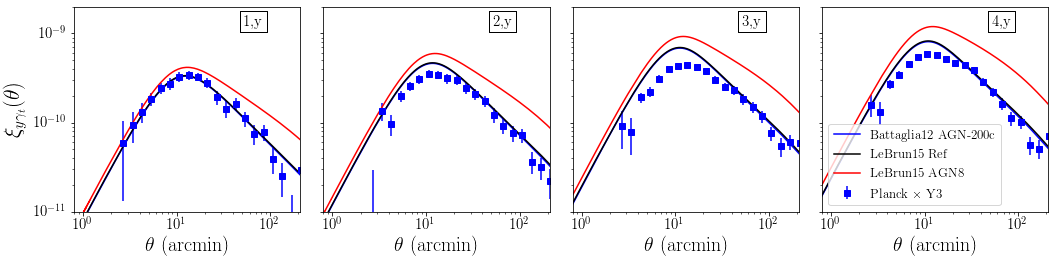

In [7]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


file_names = ['/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_lowbrokenpl.npz',
'/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_nobreak.npz',
'/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_lowbrokenpl_negp.npz']

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')






nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        wtheta_ygt_1 = np.load(file_names[0])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        wtheta_ygt_2 = np.load(file_names[1])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        wtheta_ygt_3 = np.load(file_names[2])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        
        theta = np.load(file_names[1])['theory_theta']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='LeBrun15 Ref')
            ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3.png',dpi=240)

















SNR y-gt Y3 bin1=12.44 sigma


/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:100: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


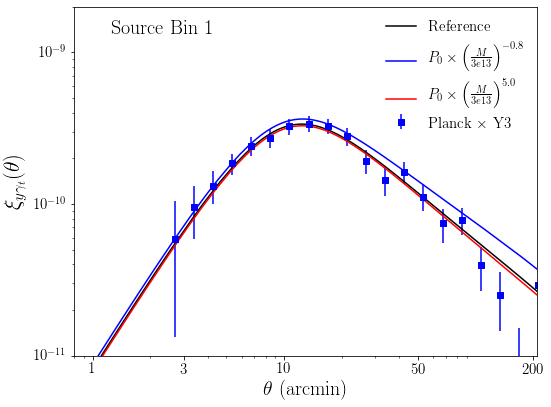

In [8]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


file_names = ['/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_lowbrokenpl_lownegp.npz',
'/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_nobreak.npz',
'/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_block_ell_gty_acty3_beamed_v2_lowbrokenpl_highposp.npz']

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')






nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,1, figsize = (8,6))
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
   
for j2 in range(4):
    wtheta_ygt_1 = np.load(file_names[0])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
    wtheta_ygt_2 = np.load(file_names[1])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
    wtheta_ygt_3 = np.load(file_names[2])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]

    theta = np.load(file_names[1])['theory_theta']

    if j2==0:

#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
        ax.errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='Reference')
        ax.errorbar(theta, wtheta_ygt_1, ls='-',color='b',label=r'$P_0 \times \bigg(\frac{M}{3e13}\bigg)^{-0.8}$')
        ax.errorbar(theta, wtheta_ygt_3, ls='-',color='r',label=r'$P_0 \times \bigg(\frac{M}{3e13}\bigg)^{5.0}$')

        yk_g = df['Yshear_y3'][str(j2)]['xip']
        yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
        yk_err = df['Yshear_y3'][str(j2)]['err']

        yk_cov = df['Yshear_y3'][str(j2)]['cov']
        inv_cov_bin = QR_inverse(yk_cov)
        snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
        print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')

        ax.errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



        ax.set_ylim(1e-11,2e-9)



        ax.set_xscale('log')
        ax.set_yscale('log')


        ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
        ticks  = np.array([1,3,10,50,200])
        labels_bottom = ticks
        ax.set_xticks(ticks)
        ax.set_xticklabels(labels_bottom,  fontsize=15)

        ax.tick_params(axis='both', which='minor', labelsize=15)    
        ax.tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax.set_xlim((0.8,210))


#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax.text( 0.08, 0.96,'Source Bin ' + str(j2+1) , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    
#         ax.text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


    jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax.set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax.legend(fontsize=15,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_P0_mod.png',dpi=240)
fig.savefig('xi_ygt_P0_mod.pdf')

















SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y3 bin4=19.76 sigma


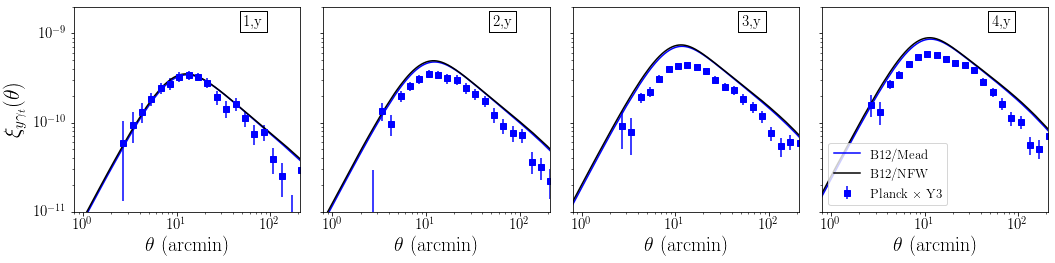

In [40]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


file_names = ['/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_wmeadmod_bt1.npz',
'/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1.npz',
]

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')






nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        wtheta_ygt_1 = np.load(file_names[0])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        wtheta_ygt_2 = np.load(file_names[1])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#         wtheta_ygt_3 = np.load(file_names[2])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        
        theta = np.load(file_names[1])['theory_theta']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label='B12/Mead')
            ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3.png',dpi=240)


















SNR kk Y3 bin1=8.22 sigma
SNR kk Y3 bin2=11.8 sigma
SNR kk Y3 bin3=22.82 sigma
SNR kk Y3 bin4=30.85 sigma


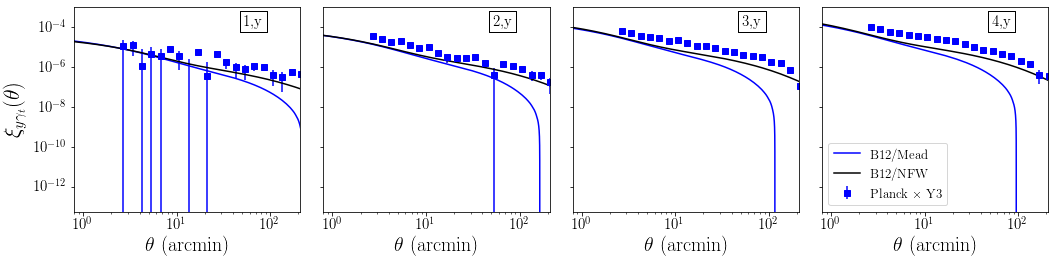

In [38]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


file_names = ['/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_wmeadmod.npz',
'/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nobreak.npz',
]

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')






nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        wtheta_ygt_1 = np.load(file_names[0])['theory_wkk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        wtheta_ygt_2 = np.load(file_names[1])['theory_wkk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#         wtheta_ygt_3 = np.load(file_names[2])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        
        theta = np.load(file_names[1])['theory_theta']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label='B12/Mead')
            ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['shearshear_y3'][str(j2) + '_' + str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+ '_' + str(j2)]['theta'] * 180./np.pi
            yk_err = df['shearshear_y3'][str(j2)+ '_' + str(j2)]['err']
            
            yk_cov = df['shearshear_y3'][str(j2)+ '_' + str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR kk Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



#             ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((0.8,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3.png',dpi=240)




















In [3]:
import pickle as pk
import numpy as np
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')
    
yk_th_g = df['Yshear_y3'][str(1)]['theta'] * 180./np.pi

    

In [8]:
yk_th_g


array([  2.67862175,   3.37218499,   4.24532937,   5.34455303,
         6.72839363,   8.47054572,  10.66378525,  13.42491024,
        16.90096065,  21.27704885,  26.78621749,  33.72184988,
        42.45329375,  53.44553031,  67.28393626,  84.70545716,
       106.63785253, 134.24910241, 169.00960654, 212.77048851])

In [10]:
th_log = np.log(yk_th_g)
th_binc = yk_th_g
th_dlog = np.log(th_binc[1]/th_binc[0])
th_edge = np.arange(th_log[0] - th_dlog/2., th_log[-1] + 3.*th_dlog/2., th_dlog)
print(np.exp(th_edge))



[  2.38732415   3.00546303   3.78365379   4.7633379    5.99668713
   7.54938182   9.50410861  11.96496385  15.06299704  18.96318975
  23.87324146  30.05463034  37.83653788  47.63337903  59.96687131
  75.49381816  95.04108611 119.64963847 150.62997038 189.63189749
 238.73241464]


SNR y-gt Y3 bin1=12.44 sigma
SNR y-gt Y3 bin2=13.81 sigma
SNR y-gt Y3 bin3=17.88 sigma
SNR y-gt Y3 bin4=19.76 sigma


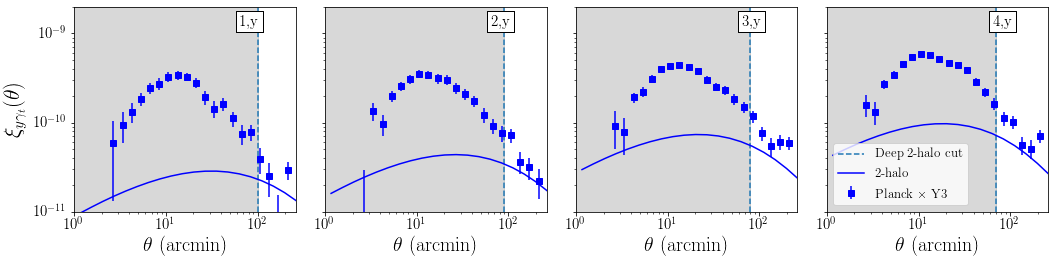

In [95]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))


file_names = ['/Users/shivam/Downloads/results_block_ell_gty_plancky3_beamed_v2_nfw_bt1_getbPe.npz',
]

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')






nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
hline_array = [100.,90.,80,70]
for j1 in range(2):    
    for j2 in range(4):
        wtheta_ygt_1 = np.load(file_names[0])['theory_gty_2h_bp_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#         wtheta_ygt_2 = np.load(file_names[1])['theory_wkk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
#         wtheta_ygt_3 = np.load(file_names[2])['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
        
        theta = np.load(file_names[0])['theory_gty_2h_bp_theta']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_1, ls='-',color='b',label=r'2-halo')
            ax[j2].axvline(hline_array[j2],ls='--',label='Deep 2-halo cut')
            ax[j2].axvspan(0,hline_array[j2],color='gray',alpha=0.3)
#             ax[j2].errorbar(theta, wtheta_ygt_2, ls='-',color='k',label='B12/NFW')
#             ax[j2].errorbar(theta, wtheta_ygt_3, ls='-',color='r',label='LeBrun15 AGN8')

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3')



            ax[j2].set_ylim(1e-11,2e-9)


        
        ax[j2].set_xscale('log')
        ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([1,3,10,50,200])
            labels_bottom = ticks
            ax[j2].set_xticks(ticks)
            ax[j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((1.0,260))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_ygt_allbins_bPe_planckxy3.pdf')




















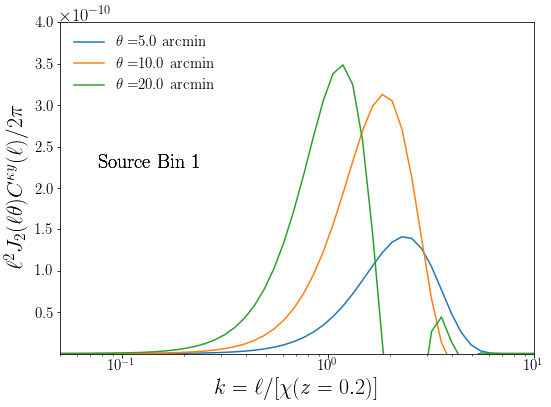

In [9]:
import scipy as sp
import colossus
from colossus.cosmology import cosmology
from colossus.lss import bias
from colossus.lss import mass_function
params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
cosmology.addCosmology('des_cosmo', params)
cosmof = cosmology.setCosmology('des_cosmo')

zval = 0.2

DA = cosmof.angularDiameterDistance(zval)

dref = np.load(file_names[1])
l_array = dref['theory_ell']

theta_val = np.array([5.,10.,20.])
binv = 1

fig, ax = pl.subplots(1,1, figsize = (8,6))
for j in range(len(theta_val)):
    theta_rad = theta_val[j]*(np.pi/180.)*(1./60.)
    val1 = sp.special.jv(2, l_array * theta_rad)
    value = (l_array**2)*(val1)*(dref['theory_clky_bin_' + str(binv) + '_' + str(binv)])/(2*np.pi)

    ax.errorbar(l_array/DA, value, ls='-',marker='',label=r'$\theta = $' + str(theta_val[j]) + ' arcmin')



    ax.set_ylim(1e-17,4e-10)



    ax.set_xscale('log')
#     ax.set_yscale('log')


#     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
#     ticks  = np.array([1,3,10,50,200])
#     labels_bottom = ticks
#     ax.set_xticks(ticks)
#     ax.set_xticklabels(labels_bottom,  fontsize=15)

    ax.tick_params(axis='both', which='minor', labelsize=15)    
    ax.tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
    ax.set_xlim((0.05,10))


#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
    ax.text( 0.08, 0.6,'Source Bin ' + str(binv) , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    

ax.set_ylabel(r'$\ell^2 J_2(\ell \theta) C^{\kappa y}(\ell)/2\pi$ ', size = 22)
ax.set_xlabel(r'$k = \ell/[\chi(z=0.2)]$ ', size = 22)
ax.legend(fontsize=15,frameon=False)

pl.tight_layout()
fig.savefig('xi_ygt_k_contri.pdf')



/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


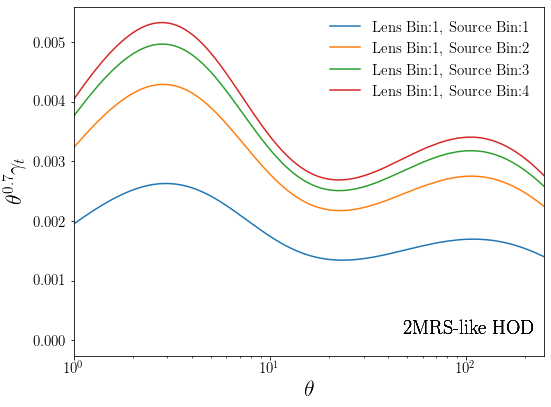

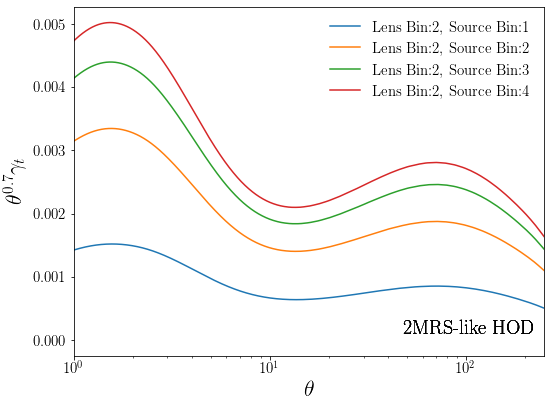

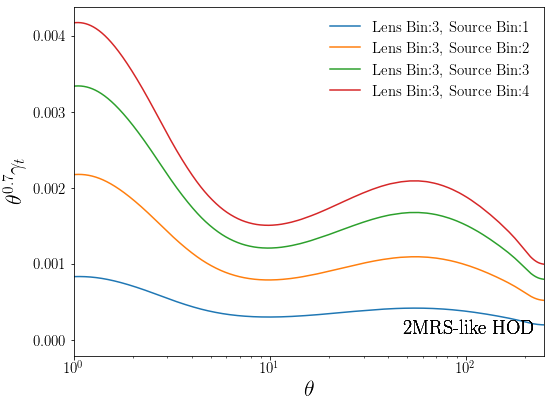

In [72]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)


bins = np.array([1,2,3,4])
bin_lens = np.array([1,2,3])
measure_dict = {}
for ji in range(len(bin_lens)):
    
    binv_lens = bin_lens[ji]
    
    dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_2mrshod_nfw_bt1_binl_' + str(binv_lens) + '_newnz_hres.npz')
    theta_theory = dref['theory_theta']
    measure_dict['theta'] = theta_theory
    # theta_val = np.array([5.,10.,20.])
    # binv = 1
    
    fig, ax = pl.subplots(1,1, figsize = (8,6))
    for j in range(len(bins)):
        binv = bins[j]
        value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        measure_dict['binl_' + str(binv_lens) + '-bins_' + str(binv)] = (dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        ax.errorbar(theta_theory, value, ls='-',marker='',label=r'Lens Bin:' + str(binv_lens) + ', Source Bin:' + str(binv))



    #     ax.set_ylim(1e-17,4e-10)



        ax.set_xscale('log')
    #     ax.set_yscale('log')


    #     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
    #     ticks  = np.array([1,3,10,50,200])
    #     labels_bottom = ticks
    #     ax.set_xticks(ticks)
    #     ax.set_xticklabels(labels_bottom,  fontsize=15)

        ax.tick_params(axis='both', which='minor', labelsize=15)    
        ax.tick_params(axis='both', which='major', labelsize=15)
    #         ax[0,0].legend(fontsize = 18, frameon = False)
        ax.set_xlim((1.0,250.))


    #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax.text( 0.7, 0.1,'2MRS-like HOD' , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    

    ax.set_ylabel(r'$\theta^{0.7} \gamma_t$ ', size = 22)
    ax.set_xlabel(r'$\theta$ ', size = 22)
    ax.legend(fontsize=15,frameon=False)

    pl.tight_layout()
    fig.savefig('gt_binl1_2MRS_binl' + str(binv_lens) + '_newnz.pdf')
    
np.savez('gt_measure_2mrs_newnz_hres.npz', **measure_dict)





/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


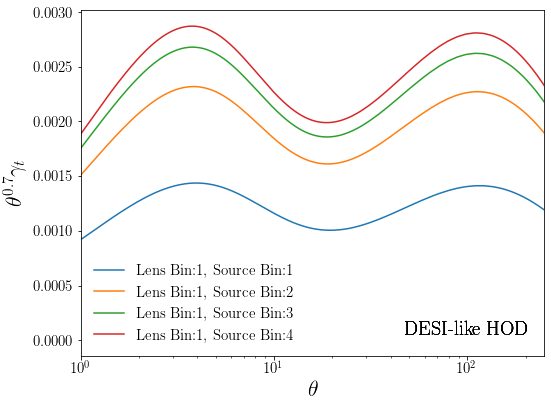

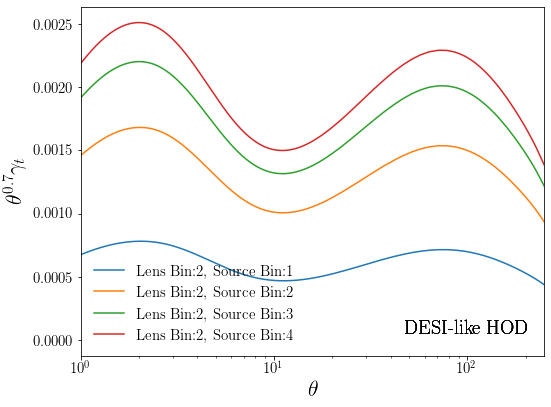

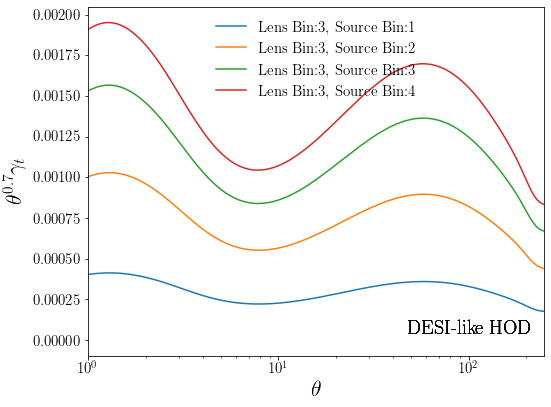

In [87]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)


bins = np.array([1,2,3,4])
bin_lens = np.array([1,2,3])
measure_dict = {}
for ji in range(len(bin_lens)):
    
    binv_lens = bin_lens[ji]
    
    dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_' + str(binv_lens) + '_newnz_vhres_diffcosmo.npz')
    theta_theory = dref['theory_theta']
    measure_dict['theta'] = theta_theory
    # theta_val = np.array([5.,10.,20.])
    # binv = 1
    
    fig, ax = pl.subplots(1,1, figsize = (8,6))
    for j in range(len(bins)):
        binv = bins[j]
        value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        measure_dict['binl_' + str(binv_lens) + '-bins_' + str(binv)] = (dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        ax.errorbar(theta_theory, value, ls='-',marker='',label=r'Lens Bin:' + str(binv_lens) + ', Source Bin:' + str(binv))



    #     ax.set_ylim(1e-17,4e-10)



        ax.set_xscale('log')
    #     ax.set_yscale('log')


    #     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
    #     ticks  = np.array([1,3,10,50,200])
    #     labels_bottom = ticks
    #     ax.set_xticks(ticks)
    #     ax.set_xticklabels(labels_bottom,  fontsize=15)

        ax.tick_params(axis='both', which='minor', labelsize=15)    
        ax.tick_params(axis='both', which='major', labelsize=15)
    #         ax[0,0].legend(fontsize = 18, frameon = False)
        ax.set_xlim((1.0,250.))


    #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax.text( 0.7, 0.1,'DESI-like HOD' , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    

    ax.set_ylabel(r'$\theta^{0.7} \gamma_t$ ', size = 22)
    ax.set_xlabel(r'$\theta$ ', size = 22)
    ax.legend(fontsize=15,frameon=False)

    pl.tight_layout()
#     fig.savefig('gt_binl1_DESI_binl' + str(binv_lens) + '_newnz.pdf')
    
np.savez('gt_measure_desi_newnz_vhres_descosmo.npz', **measure_dict)






/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


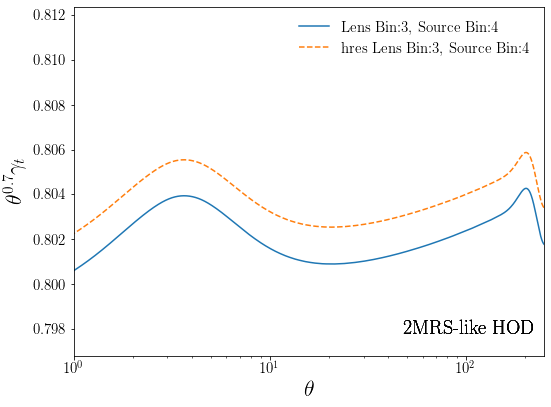

In [86]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)


bins = np.array([1,2,3,4])
bin_lens = np.array([3])
measure_dict = {}
for ji in range(len(bin_lens)):
    
    binv_lens = bin_lens[ji]
    
    dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_' + str(binv_lens) + '_newnz_hres_diffcosmo.npz')
    
    dref2 = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_' + str(binv_lens) + '_newnz_vhres_diffcosmo.npz')
    
    theta_theory = dref['theory_theta']
    measure_dict['theta'] = theta_theory
    # theta_val = np.array([5.,10.,20.])
    # binv = 1
    
    fig, ax = pl.subplots(1,1, figsize = (8,6))
    for j in range(len(bins)):
        binv = bins[j]
        value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        value2 = (theta_theory**0.7)*(dref2['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        measure_dict['binl_' + str(binv_lens) + '-bins_' + str(binv)] = (dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
        
        if j == 0:
            value_j0 = value
            value2_j0 = value2
            
        if j == 1:
            value_j1 = value
            value2_j1 = value2

        if j == 2:
            value_j2 = value
            value2_j2 = value2

        if j == 3:
            value_j3 = value
            value2_j3 = value2            
            
        if j==3:
            ax.errorbar(theta_theory, value_j2/value_j3, ls='-',marker='',label=r'Lens Bin:' + str(binv_lens) + ', Source Bin:' + str(binv))
            ax.errorbar(theta_theory, value2_j2/value2_j3, ls='--',marker='',label=r'hres Lens Bin:' + str(binv_lens) + ', Source Bin:' + str(binv))

        ax.set_xscale('log')


        ax.tick_params(axis='both', which='minor', labelsize=15)    
        ax.tick_params(axis='both', which='major', labelsize=15)
    #         ax[0,0].legend(fontsize = 18, frameon = False)
        ax.set_xlim((1.0,250.))


    #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax.text( 0.7, 0.1,'2MRS-like HOD' , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    

    ax.set_ylabel(r'$\theta^{0.7} \gamma_t$ ', size = 22)
    ax.set_xlabel(r'$\theta$ ', size = 22)
    ax.legend(fontsize=15,frameon=False)
#     ax.set_yscale('log')
    pl.tight_layout()
#     fig.savefig('gt_binl1_2MRS_binl' + str(binv_lens) + '_newnz.pdf')
    
# np.savez('gt_measure_2mrs_newnz.npz', **measure_dict)






In [56]:
from astropy.io import fits
twopt = fits.open('/Users/shivam/Downloads/sim_redmagic_cov_noIA_nomag.fits')
binl = 3
bins = 2
bin1_gt = twopt['gammat'].data['BIN1']
bin2_gt = twopt['gammat'].data['BIN2']




In [92]:
twopt['nz_source'].data['BIN1']



array([0.        , 0.30661136, 0.30661136, 0.30661136, 0.30661136,
       0.30661136, 0.29388901, 0.29388901, 0.29388901, 0.29388901,
       0.29388901, 0.50959958, 0.50959958, 0.50959958, 0.50959958,
       0.50959958, 0.64018375, 0.64018375, 0.64018375, 0.64018375,
       0.64018375, 0.95770399, 0.95770399, 0.95770399, 0.95770399,
       0.95770399, 0.95865394, 0.95865394, 0.95865394, 0.95865394,
       0.95865394, 0.86997095, 0.86997095, 0.86997095, 0.86997095,
       0.86997095, 0.87632594, 0.87632594, 0.87632594, 0.87632594,
       0.87632594, 0.82968738, 0.82968738, 0.82968738, 0.82968738,
       0.82968738, 1.27562211, 1.27562211, 1.27562211, 1.27562211,
       1.27562211, 1.66578345, 1.66578345, 1.66578345, 1.66578345,
       1.66578345, 2.08539622, 2.08539622, 2.08539622, 2.08539622,
       2.08539622, 1.60214504, 1.60214504, 1.60214504, 1.60214504,
       1.60214504, 1.24814205, 1.24814205, 1.24814205, 1.24814205,
       1.24814205, 1.70724533, 1.70724533, 1.70724533, 1.70724

No handles with labels found to put in legend.
/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


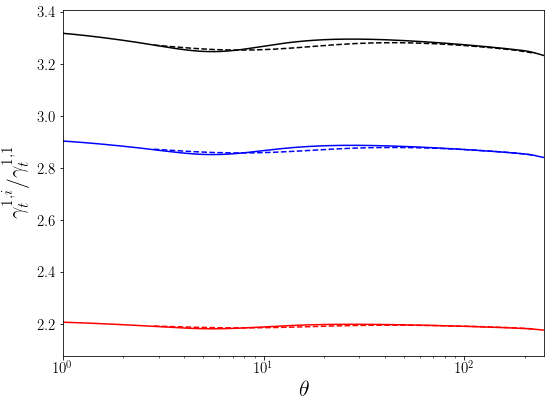

In [71]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)
binv_lens = 2
dref2mrs = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_' + str(binv_lens) + '_newnz_hres.npz')
# dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_1.npz')
theta_theory = dref['theory_theta']
bins = np.array([1,2,3,4])

# theta_val = np.array([5.,10.,20.])
# binv = 1
colors = ['red','blue','black']
fig, ax = pl.subplots(1,1, figsize = (8,6))
for j in range(len(bins)):
    binv = bins[j]
#     value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    value2mrs = (theta_theory**0.7)*(dref2mrs['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    
    ind_sel = np.where( (bin1_gt == binv_lens) & (bin2_gt == binv))[0]
    twopt_gt_bin = twopt['gammat'].data['VALUE'][ind_sel]
    twopt_theta_bin = twopt['gammat'].data['ANG'][ind_sel]


    
    if j == 0:
#         value11 = value
        value112mrs = value2mrs
        value11_twotp = twopt_gt_bin
    
    else:    
#         ax.errorbar(theta_theory, value/value11, ls='-',marker='',color=colors[j-1],label=r'Source Bin:' + str(binv))
        ax.errorbar(theta_theory, value2mrs/value112mrs, ls='-',color=colors[j-1],marker='')
        ax.errorbar(twopt_theta_bin, twopt_gt_bin/value11_twotp, ls='--',color=colors[j-1],marker='')



#     ax.set_ylim(1e-17,4e-10)



    ax.set_xscale('log')
#     ax.set_yscale('log')


#     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
#     ticks  = np.array([1,3,10,50,200])
#     labels_bottom = ticks
#     ax.set_xticks(ticks)
#     ax.set_xticklabels(labels_bottom,  fontsize=15)

    ax.tick_params(axis='both', which='minor', labelsize=15)    
    ax.tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
    ax.set_xlim((1.0,250.))


#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)  

ax.set_ylabel(r'$\gamma^{1,i}_t/\gamma^{1,1}_t$ ', size = 22)
ax.set_xlabel(r'$\theta$ ', size = 22)
ax.legend(fontsize=18,frameon=False)

pl.tight_layout()
# fig.savefig('gt_ratio_binl1_solidDESI_dashed2MRS.pdf')










/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:57: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:58: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


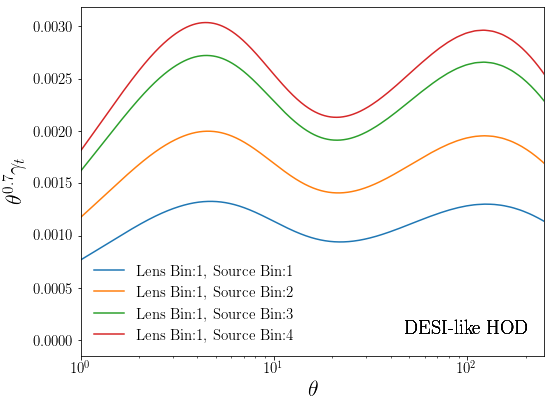

In [33]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)

dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_1.npz')
theta_theory = dref['theory_theta']
bins = np.array([1,2,3,4])
binv_lens = 1
# theta_val = np.array([5.,10.,20.])
# binv = 1
measure_dict = {'theta':theta_theory}
fig, ax = pl.subplots(1,1, figsize = (8,6))
for j in range(len(bins)):
    binv = bins[j]
    value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    measure_dict[binv] = (dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    ax.errorbar(theta_theory, value, ls='-',marker='',label=r'Lens Bin:' + str(binv_lens) + ', Source Bin:' + str(binv))



#     ax.set_ylim(1e-17,4e-10)



    ax.set_xscale('log')
#     ax.set_yscale('log')


#     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
#     ticks  = np.array([1,3,10,50,200])
#     labels_bottom = ticks
#     ax.set_xticks(ticks)
#     ax.set_xticklabels(labels_bottom,  fontsize=15)

    ax.tick_params(axis='both', which='minor', labelsize=15)    
    ax.tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
    ax.set_xlim((1.0,250.))


#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
    ax.text( 0.7, 0.1,'DESI-like HOD' , verticalalignment='top', horizontalalignment='left', transform=ax.transAxes, fontsize=20)    

ax.set_ylabel(r'$\theta^{0.7} \gamma_t$ ', size = 22)
ax.set_xlabel(r'$\theta$ ', size = 22)
ax.legend(fontsize=15,frameon=False)

pl.tight_layout()
fig.savefig('gt_binl1_DESI.pdf')

np.savez('gt_measure_DESI.npz',theta=theta_theory,bin1=measure_dict[1],bin2=measure_dict[2],bin3=measure_dict[3],bin4=measure_dict[4])





In [34]:
df = np.load('gt_measure_DESI.npz')
[*df.keys()]




['theta', 'bin1', 'bin2', 'bin3', 'bin4']

/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


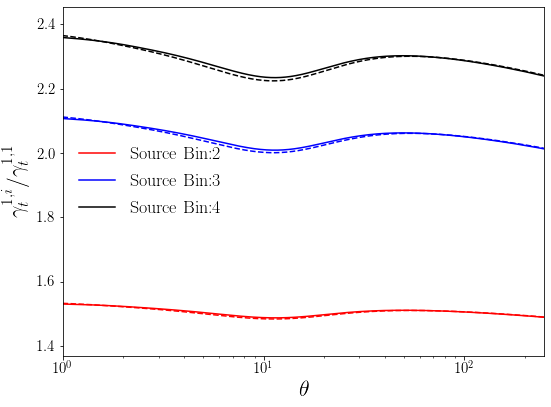

In [21]:
import scipy as sp
import colossus
# from colossus.cosmology import cosmology
# from colossus.lss import bias
# from colossus.lss import mass_function
# params = {'flat': True, 'H0': 70.0, 'Om0': 0.283705, 'Ob0': 0.044, 'sigma8': 0.801, 'ns': 0.96}
# cosmology.addCosmology('des_cosmo', params)
# cosmof = cosmology.setCosmology('des_cosmo')

# zval = 0.2

# DA = cosmof.angularDiameterDistance(zval)

dref2mrs = np.load('/Users/shivam/Downloads/results_block_ell_gt_2mrshod_nfw_bt1_binl_1.npz')
dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_1.npz')
theta_theory = dref['theory_theta']
bins = np.array([1,2,3,4])
binv_lens = 1
# theta_val = np.array([5.,10.,20.])
# binv = 1
colors = ['red','blue','black']
fig, ax = pl.subplots(1,1, figsize = (8,6))
for j in range(len(bins)):
    binv = bins[j]
    value = (theta_theory**0.7)*(dref['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    value2mrs = (theta_theory**0.7)*(dref2mrs['theory_gt_bin_' + str(binv_lens) + '_' + str(binv)])
    if j == 0:
        value11 = value
        value112mrs = value2mrs
    
    else:    
        ax.errorbar(theta_theory, value/value11, ls='-',marker='',color=colors[j-1],label=r'Source Bin:' + str(binv))
        ax.errorbar(theta_theory, value2mrs/value112mrs, ls='--',color=colors[j-1],marker='')



#     ax.set_ylim(1e-17,4e-10)



    ax.set_xscale('log')
#     ax.set_yscale('log')


#     ax.set_xlabel(r'$\theta$ (arcmin)', size = 20)
#     ticks  = np.array([1,3,10,50,200])
#     labels_bottom = ticks
#     ax.set_xticks(ticks)
#     ax.set_xticklabels(labels_bottom,  fontsize=15)

    ax.tick_params(axis='both', which='minor', labelsize=15)    
    ax.tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
    ax.set_xlim((1.0,250.))


#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)  

ax.set_ylabel(r'$\gamma^{1,i}_t/\gamma^{1,1}_t$ ', size = 22)
ax.set_xlabel(r'$\theta$ ', size = 22)
ax.legend(fontsize=18,frameon=False)

pl.tight_layout()
fig.savefig('gt_ratio_binl1_solidDESI_dashed2MRS.pdf')








In [49]:
from astropy.io import fits

# df_new2 = fits.open('/Users/shivam/Downloads/sim_fid_v1_wcov.fits')

df_new = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_fast_newnz_v2.fits')

df = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_hres_newnz_v2.fits')

df.info()
cov_diag = np.diag(df_new['COVMAT'].data)



Filename: /Users/shivam/Downloads/sim_tatt_nl_mag_tmp_hres_newnz_v2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        17   (900, 900)   float64   
  2  xip           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  3  xim           1 BinTableHDU     29   200R x 5C   [K, K, K, D, D]   
  4  gammat        1 BinTableHDU     29   400R x 5C   [K, K, K, D, D]   
  5  wtheta        1 BinTableHDU     29   100R x 5C   [K, K, K, D, D]   
  6  nz_source     1 BinTableHDU     24   746R x 7C   [D, D, D, D, D, D, D]   
  7  nz_lens       1 BinTableHDU     26   201R x 8C   [D, D, D, D, D, D, D, D]   


In [50]:

dref = np.load('/Users/shivam/Downloads/results_block_ell_gt_desihod_nfw_bt1_binl_' + str(1) + '_newnz.npz')

[*dref.keys()]




['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'nbin',
 'nz',
 'z',
 'nbar--1',
 'nbar--2',
 'nbar--3',
 'nbar--4',
 'nbar--5',
 'noisek--1',
 'noisek--2',
 'noisek--3',
 'noisek--4',
 'cov_total_gg_gg_bin_1_1',
 'cov_total_gg_gg_bin_2_2',
 'cov_total_gg_gg_bin_3_3',
 'cov_total_gg_gg_bin_4_4',
 'cov_total_gy_gy_bin_1_1',
 'cov_total_gy_gy_bin_2_2',
 'cov_total_gy_gy_bin_3_3',
 'cov_total_gy_gy_bin_4_4',
 'cov_total_kk_kk_bin_1_1',
 'cov_total_kk_kk_bin_2_2',
 'cov_total_kk_kk_bin_3_3',
 'cov_total_kk_kk_bin_4_4',
 'cov_total_ky_ky_bin_1_1',
 'cov_total_ky_ky_bin_2_2',
 'cov_total_ky_ky_bin_3_3',
 'cov_total_ky_ky_bin_4_4',
 'cov_total_yy_yy',
 'covg_gg_gg_bin_1_1',
 'covg_gg_gg_bin_2_2',
 'covg_gg_gg_bin_3_3',
 'covg_gg_gg_bin_4_4',
 'covg_gy_gy_bin_1_1',
 'covg_gy_gy_bin_2_2',
 'covg_gy_gy_bin_3_3',
 'covg_gy_gy_bin_4_4',
 'covg_kk_kk_bin_1_1',
 'covg_kk_kk_bin_2_2',
 'covg_kk_kk_bin_3_3',
 'covg_kk_kk_bin_4_4',
 'covg_ky_ky_bin_1_1',
 'covg_ky_ky_bin_2_2',
 'covg_ky_ky_bin_3_3',

In [19]:
# def get_zmean(zarray,pz):
#     val = sp.integrate.simps(zarray*pz,zarray)/sp.integrate.simps(pz,zarray)
#     return val

# zmean_array = np.zeros(5)

# zarray = df['nz_lens'].data['Z_MID']
# # nz_lensd.header
# bin1 = df['nz_lens'].data['BIN1']
# zmean_array[0] = get_zmean(zarray,bin1)

# bin2 = df['nz_lens'].data['BIN2']
# zmean_array[1] = get_zmean(zarray,bin2)

# bin3 = df['nz_lens'].data['BIN3']
# zmean_array[2] = get_zmean(zarray,bin3)

# bin4 = df['nz_lens'].data['BIN4']
# zmean_array[3] = get_zmean(zarray,bin4)

# bin5 = df['nz_lens'].data['BIN5']
# zmean_array[4] = get_zmean(zarray,bin5)

# np.savetxt('/Users/shivam/Desktop/nz_lens.txt',np.array([zarray,bin1,bin2,bin3,bin4,bin5]).T,header='z bin1 bin2 bin3 bin4 bin5')


# radius = 3.
# theta_array = np.zeros(5)

# for j in range(5):
#     chiz = cosmof.comovingDistance(0,zmean_array[j])
#     print(chiz)
#     theta_rad = radius/chiz
#     theta_arcmin = theta_rad * (180./np.pi)* 60
    
#     theta_array[j] = theta_arcmin
# print(theta_array)



In [20]:

# zarray = df['nz_source'].data['Z_MID']
# # nz_lensd.header
# bin1 = df['nz_source'].data['BIN1']
# bin2 = df['nz_source'].data['BIN2']
# bin3 = df['nz_source'].data['BIN3']
# bin4 = df['nz_source'].data['BIN4']

# np.savetxt('/Users/shivam/Desktop/nz_source.txt',np.array([zarray,bin1,bin2,bin3,bin4]).T,header='z bin1 bin2 bin3 bin4 ')






In [50]:
wt_cs_new = df_new['wtheta'].data['VALUE']

gt_cs_new = df_new['gammat'].data['VALUE']

xip_cs_new = df_new['xip'].data['VALUE']

xim_cs_new = df_new['xim'].data['VALUE']



In [22]:
wt_cs = df['wtheta'].data['VALUE']

gt_cs = df['gammat'].data['VALUE']

xip_cs = df['xip'].data['VALUE']

xim_cs = df['xim'].data['VALUE']




In [23]:
data_lin_cl = np.loadtxt('/Users/shivam/Downloads/xi_Y3_noIA_b1')
data_nl_cl = np.loadtxt('//Users/shivam/Downloads/xi_Y3_noIA_b1_b2')

data_lin_cl.shape
ell = data_lin_cl[:,0]
Cl_all_lin_cl = data_lin_cl[:,1]
Cl_all_nl_cl = data_nl_cl[:,1]






In [24]:
wt_diff_cs_cl = wt_cs - Cl_all_lin_cl[800:]

gt_diff_cs_cl = gt_cs - Cl_all_lin_cl[400:800]




In [51]:
wt_diff_cs_new = wt_cs - wt_cs_new

gt_diff_cs_new = gt_cs - gt_cs_new

xip_diff_cs_new = xip_cs - xip_cs_new

xim_diff_cs_new = xim_cs - xim_cs_new



In [26]:
xip_diff_cs_cl = xip_cs - Cl_all_lin_cl[0:200]
xim_diff_cs_cl = xim_cs - Cl_all_lin_cl[200:400]





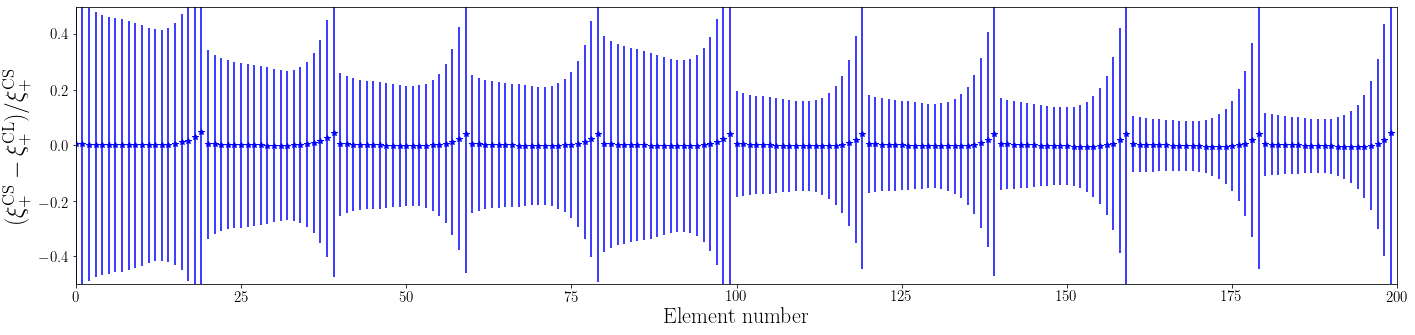

In [27]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 0
ind_max = 200

ax.errorbar(np.arange(0,ind_max - ind_min),xip_diff_cs_cl/xip_cs, np.sqrt(cov_diag[ind_min:ind_max])/xip_cs, color = 'blue', marker='*',linestyle='')  

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\xi^{\rm CS}_{+} - \xi^{\rm CL}_{+})/\xi^{\rm CS}_{+}$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')




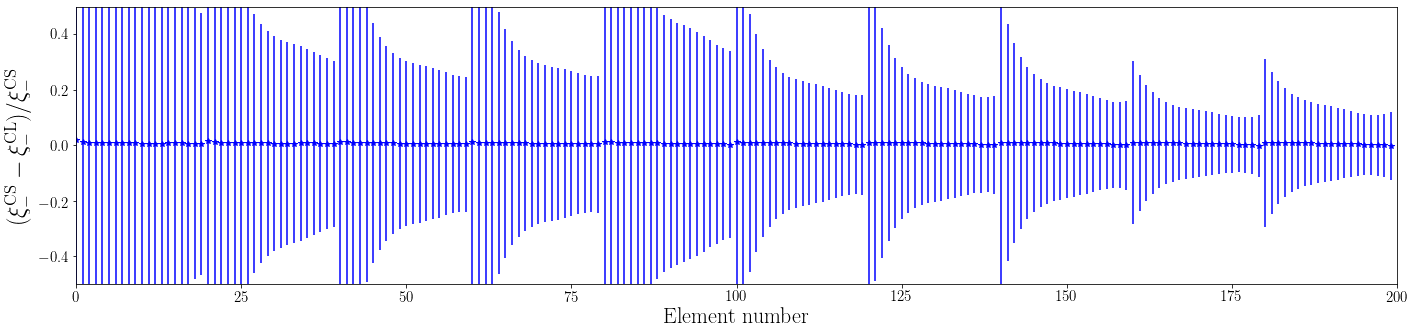

In [28]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 200
ind_max = 400

ax.errorbar(np.arange(0,ind_max - ind_min),xim_diff_cs_cl/xim_cs, np.sqrt(cov_diag[ind_min:ind_max])/xim_cs, color = 'blue', marker='*',linestyle='')  

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\xi^{\rm CS}_{-} - \xi^{\rm CL}_{-})/\xi^{\rm CS}_{-}$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')





In [79]:
from astropy.io import fits

df_new = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_fast_newnz_v2_sdchi20_nell100.fits')
df = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_hres_newnz_v2.fits')

# df_new = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_fast_oldnz_v2.fits')
# df = fits.open('/Users/shivam/Downloads/sim_tatt_nl_mag_tmp_hres_oldnz_v2.fits')

wt_cs = df['wtheta'].data['VALUE']
gt_cs = df['gammat'].data['VALUE']
xip_cs = df['xip'].data['VALUE']
xim_cs = df['xim'].data['VALUE']

wt_cs_new = df_new['wtheta'].data['VALUE']
gt_cs_new = df_new['gammat'].data['VALUE']
xip_cs_new = df_new['xip'].data['VALUE']
xim_cs_new = df_new['xim'].data['VALUE']

wt_diff_cs_new = wt_cs - wt_cs_new
gt_diff_cs_new = gt_cs - gt_cs_new
xip_diff_cs_new = xip_cs - xip_cs_new
xim_diff_cs_new = xim_cs - xim_cs_new
cov_total = df_new['COVMAT'].data


In [80]:
diff_all = np.array([np.hstack([xip_diff_cs_new,xim_diff_cs_new,gt_diff_cs_new,wt_diff_cs_new])])
print(diff_all.shape)
print(cov_total.shape)
deltachi2 = np.dot(diff_all, np.dot(np.linalg.inv(cov_total),diff_all.T))
print(deltachi2)



(1, 900)
(900, 900)
[[0.04846166]]


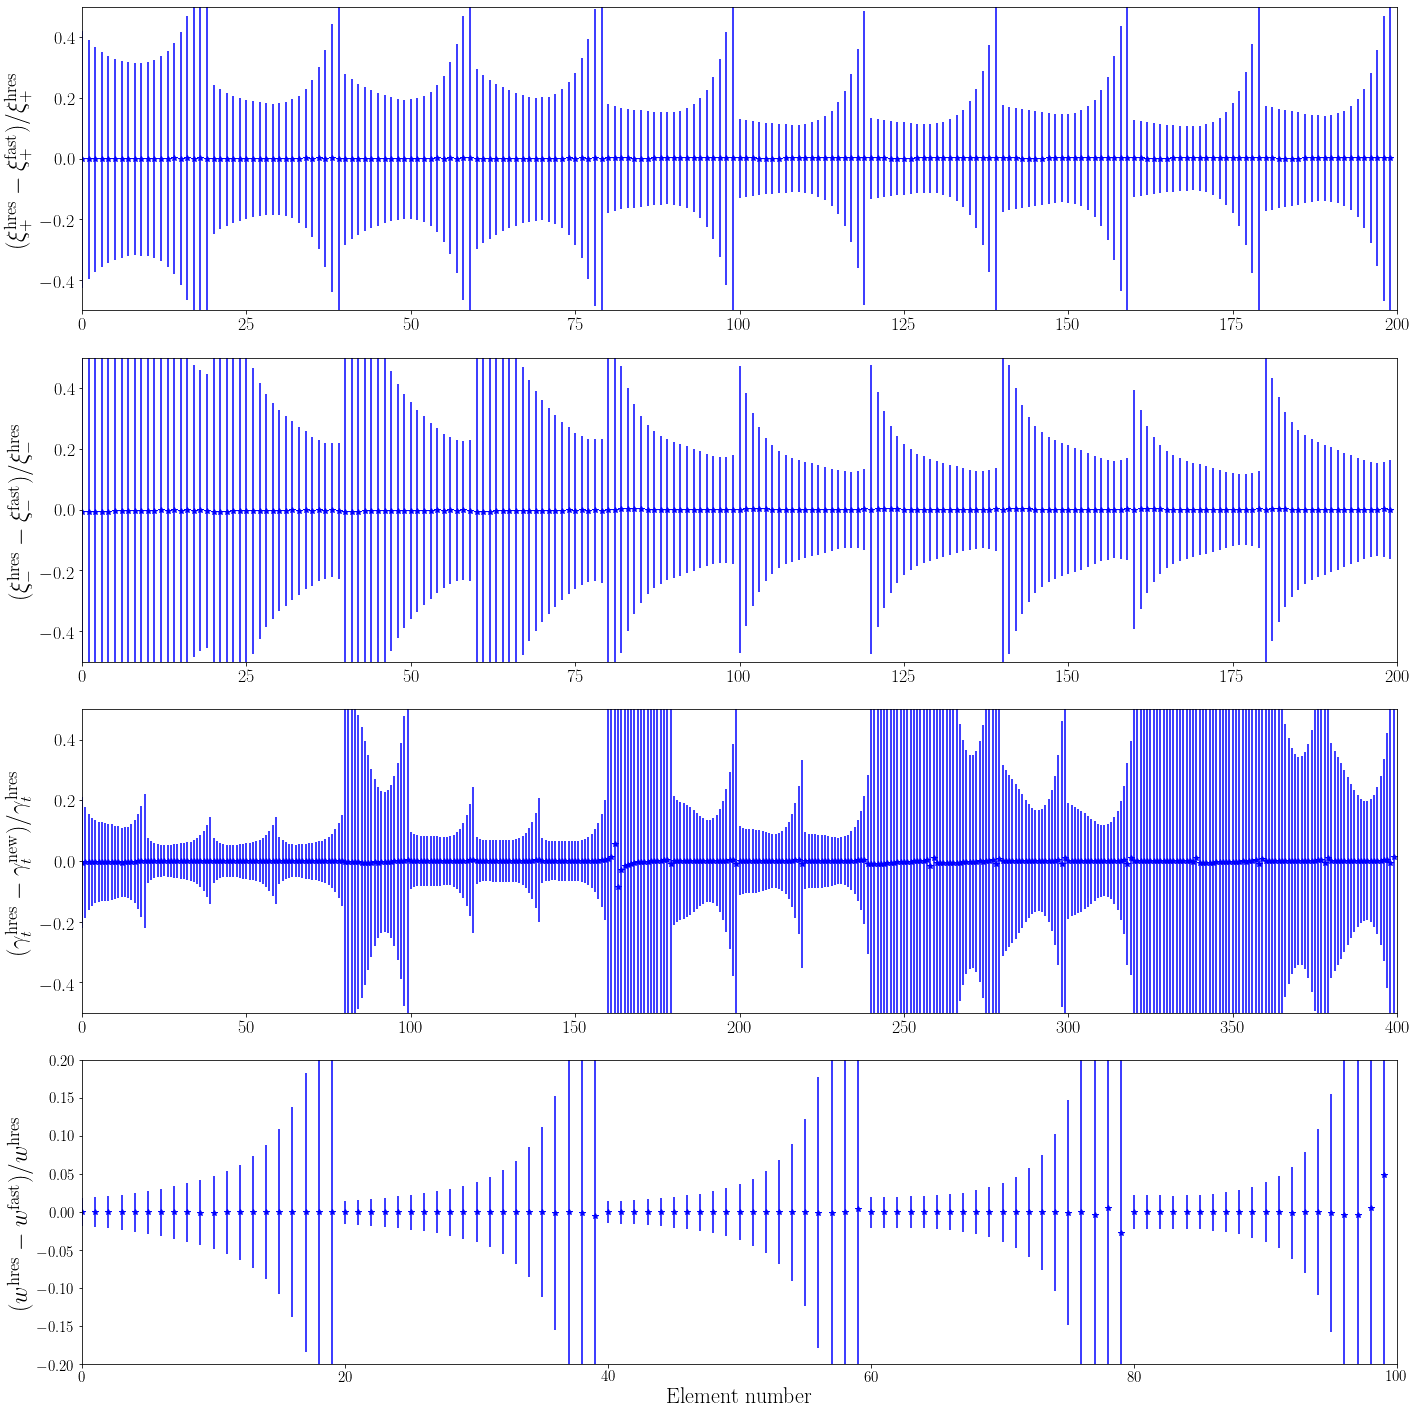

In [82]:



fig, ax_all = pl.subplots(4,1, figsize = (20,20))

for j in range(len(ax_all)):
    ax = ax_all[j]
    if j == 0:
        
        ind_min = 0
        ind_max = 200

        ax.errorbar(np.arange(0,ind_max - ind_min),xip_diff_cs_new/xip_cs, np.sqrt(cov_diag[ind_min:ind_max])/xip_cs, color = 'blue', marker='*',linestyle='')  

        ax.set_ylim(-0.5,0.5)
        ax.set_xlim(0,ind_max - ind_min)
#         ax.set_xlabel(r'Element number', size = 22)
        ax.set_ylabel(r'$(\xi^{\rm hres}_{+} - \xi^{\rm fast}_{+})/\xi^{\rm hres}_{+}$', size = 24)
    if j == 1:
        ind_min = 200
        ind_max = 400

        ax.errorbar(np.arange(0,ind_max - ind_min),xim_diff_cs_new/xim_cs, np.sqrt(cov_diag[ind_min:ind_max])/xim_cs, color = 'blue', marker='*',linestyle='')  
        ax.set_ylim(-0.5,0.5)
        ax.set_xlim(0,ind_max - ind_min)
#         ax.set_xlabel(r'Element number', size = 22)
        ax.set_ylabel(r'$(\xi^{\rm hres}_{-} - \xi^{\rm fast}_{-})/\xi^{\rm hres}_{-}$', size = 24)

    if j == 2:
        ind_min = 400
        ind_max = 800
        ax.errorbar(np.arange(0,ind_max - ind_min),gt_diff_cs_new/gt_cs, np.sqrt(cov_diag[ind_min:ind_max])/gt_cs, color = 'blue', marker='*',linestyle='') 
        ax.set_ylim(-0.5,0.5)
        ax.set_xlim(0,ind_max - ind_min)
#         ax.set_xlabel(r'Element number', size = 22)
        ax.set_ylabel(r'$(\gamma^{\rm hres}_t - \gamma^{\rm new}_t)/\gamma^{\rm hres}_t$', size = 24)

    if j == 3:
        ind_min = 800
        ind_max = 900
        ax.errorbar(np.arange(0,ind_max - ind_min),wt_diff_cs_new/wt_cs, np.sqrt(cov_diag[ind_min:ind_max])/wt_cs, color = 'blue', marker='*',linestyle='') 

        ax.set_ylim(-0.2,0.2)
        ax.set_xlim(0,ind_max - ind_min)
        ax.set_xlabel(r'Element number', size = 22)
        ax.set_ylabel(r'$(w^{\rm hres} - w^{\rm fast})/w^{\rm hres}$', size = 24)



        

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
fig.savefig('/Users/shivam/Desktop/alldiff_hres_fast_newnz_v2.pdf', format = 'pdf')





In [ ]:
binl_array = np.array([1,2,3,4,5])
bins_array = np.array([1,2,3,4])



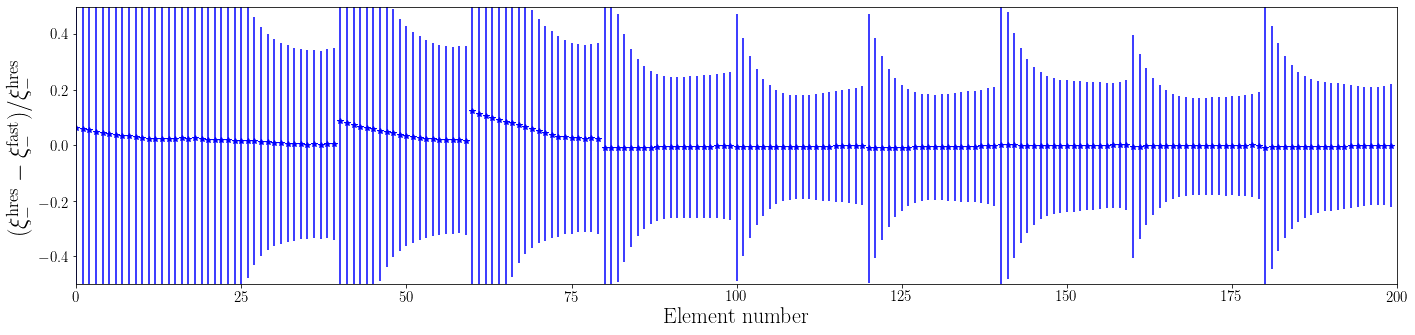

In [58]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 0
ind_max = 200

ax.errorbar(np.arange(0,ind_max - ind_min),xim_diff_cs_new/xim_cs, np.sqrt(cov_diag[ind_min:ind_max])/xim_cs, color = 'blue', marker='*',linestyle='')  

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\xi^{\rm hres}_{-} - \xi^{\rm fast}_{-})/\xi^{\rm hres}_{-}$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')






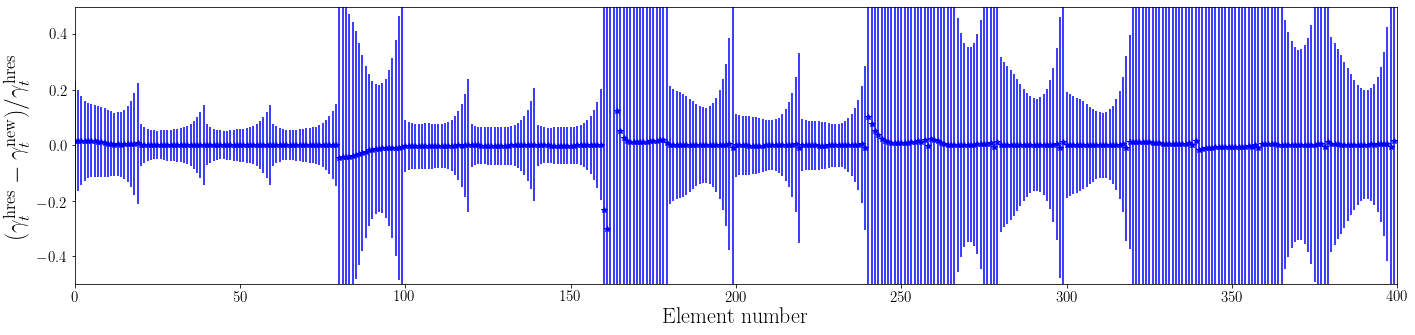

In [59]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 400
ind_max = 800



ax.errorbar(np.arange(0,ind_max - ind_min),gt_diff_cs_new/gt_cs, np.sqrt(cov_diag[ind_min:ind_max])/gt_cs, color = 'blue', marker='*',linestyle='') 

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\gamma^{\rm hres}_t - \gamma^{\rm new}_t)/\gamma^{\rm hres}_t$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# # fig.savefig('gt_hres_fast.pdf', format = 'pdf')







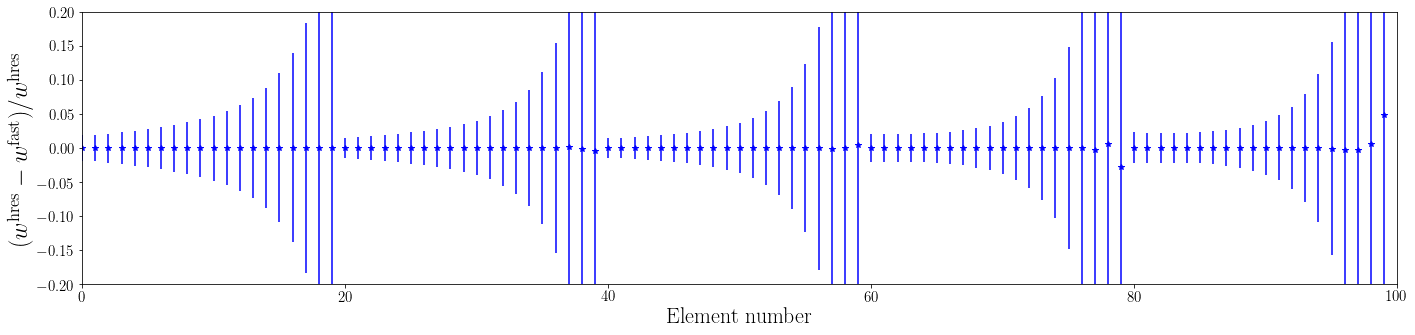

In [60]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 800
ind_max = 900



ax.errorbar(np.arange(0,ind_max - ind_min),wt_diff_cs_new/wt_cs, np.sqrt(cov_diag[ind_min:ind_max])/wt_cs, color = 'blue', marker='*',linestyle='') 

ax.set_ylim(-0.2,0.2)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(w^{\rm hres} - w^{\rm fast})/w^{\rm hres}$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')






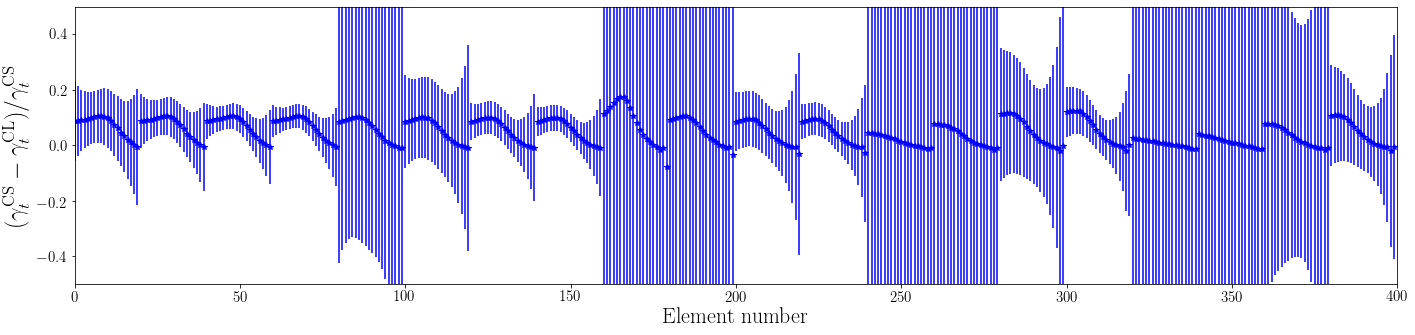

In [29]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 400
ind_max = 800



ax.errorbar(np.arange(0,ind_max - ind_min),gt_diff_cs_cl/gt_cs, np.sqrt(cov_diag[ind_min:ind_max])/gt_cs, color = 'blue', marker='*',linestyle='') 

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\gamma^{\rm CS}_t - \gamma^{\rm CL}_t)/\gamma^{\rm CS}_t$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')



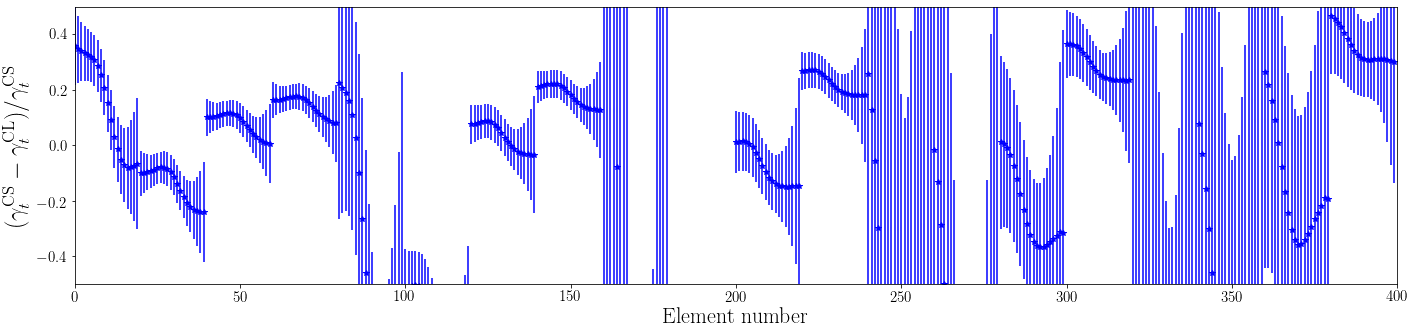

In [46]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 400
ind_max = 800



ax.errorbar(np.arange(0,ind_max - ind_min),gt_diff_cs_new/gt_cs, np.sqrt(cov_diag[ind_min:ind_max])/gt_cs, color = 'blue', marker='*',linestyle='') 

ax.set_ylim(-0.5,0.5)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(\gamma^{\rm CS}_t - \gamma^{\rm CL}_t)/\gamma^{\rm CS}_t$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# # fig.savefig('gt_hres_fast.pdf', format = 'pdf')






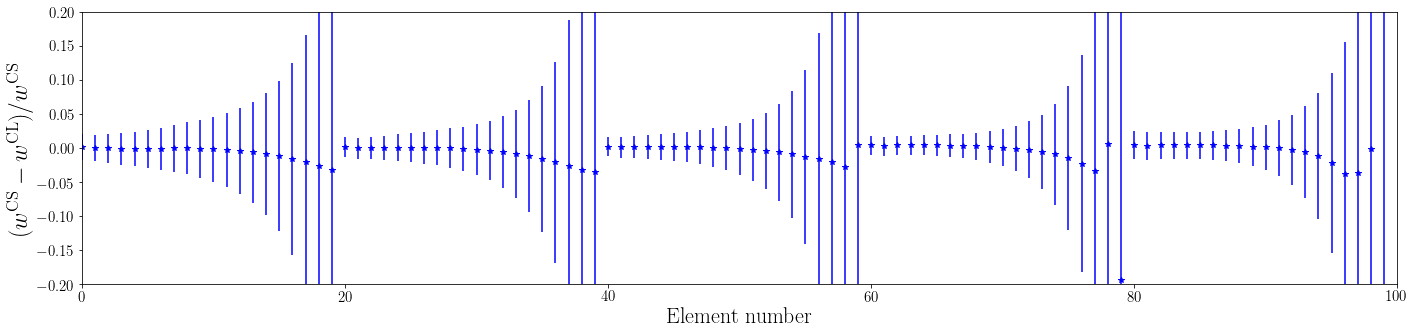

In [206]:



fig, ax = pl.subplots(1,1, figsize = (20,5))

ind_min = 800
ind_max = 900



ax.errorbar(np.arange(0,ind_max - ind_min),wt_diff_cs_cl/wt_cs, np.sqrt(cov_diag[ind_min:ind_max])/wt_cs, color = 'blue', marker='*',linestyle='') 

ax.set_ylim(-0.2,0.2)
ax.set_xlim(0,ind_max - ind_min)
ax.set_xlabel(r'Element number', size = 22)
ax.set_ylabel(r'$(w^{\rm CS} - w^{\rm CL})/w^{\rm CS}$', size = 24)

pl.tick_params(axis='both', which='major', labelsize=15)
pl.tick_params(axis='both', which='minor', labelsize=15)

pl.tight_layout()
# fig.savefig('gt_hres_fast.pdf', format = 'pdf')




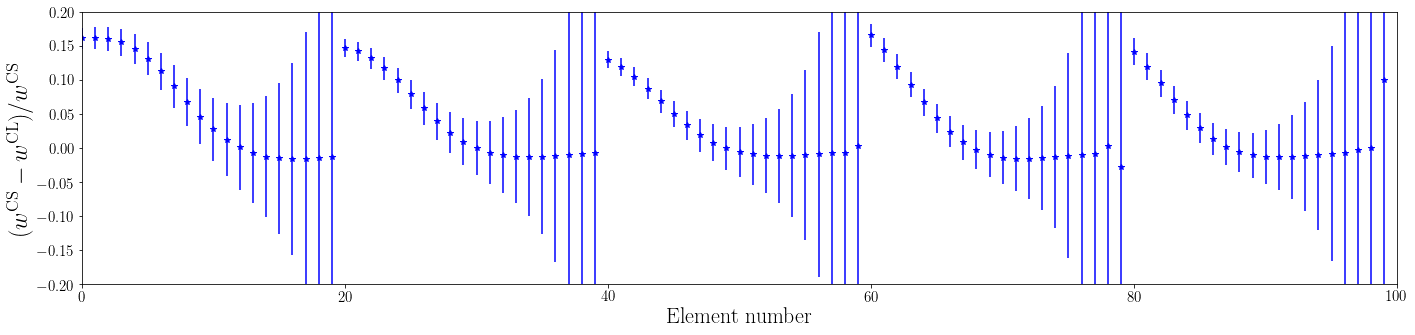